<a href="https://colab.research.google.com/github/kesha022/ML_Data_Cleaning_And_Feature_Selection_/blob/main/ML_Data_Cleaning_and_Feature_Selection_Student_Performance_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# installing dependencies
!pip install eli5
!pip install impyute
!pip install seaborn

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [118]:
# reading dataset
data = pd.read_csv("/content/student_data.csv")

In [119]:
# viewing data in the file
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [120]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**The dataset has 17 Categorical and 16 Numerical Features.**

In [121]:
#Before examining price feature, categorical variables will be mapped with help of cat.code. This will assist to make easier and comprehensible data analysis.
data['school']= data['school'].astype("category").cat.codes
data['sex']= data ['sex'].astype("category").cat.codes
data['address']= data ['address'].astype("category").cat.codes
data['famsize']= data ['famsize'].astype("category").cat.codes
data['Pstatus']= data ['Pstatus'].astype("category").cat.codes
data['Mjob']= data ['Mjob'].astype("category").cat.codes
data['Fjob']= data ['Fjob'].astype("category").cat.codes
data['reason']= data ['reason'].astype("category").cat.codes
data['guardian']= data ['guardian'].astype("category").cat.codes
data['schoolsup']= data ['schoolsup'].astype("category").cat.codes
data['famsup']= data ['famsup'].astype("category").cat.codes
data['paid']= data ['paid'].astype("category").cat.codes
data['activities']= data ['activities'].astype("category").cat.codes
data['nursery']= data ['nursery'].astype("category").cat.codes
data['higher']= data ['higher'].astype("category").cat.codes
data['internet']= data ['internet'].astype("category").cat.codes
data['romantic']= data ['romantic'].astype("category").cat.codes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int8 
 1   sex         395 non-null    int8 
 2   age         395 non-null    int64
 3   address     395 non-null    int8 
 4   famsize     395 non-null    int8 
 5   Pstatus     395 non-null    int8 
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int8 
 9   Fjob        395 non-null    int8 
 10  reason      395 non-null    int8 
 11  guardian    395 non-null    int8 
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int8 
 16  famsup      395 non-null    int8 
 17  paid        395 non-null    int8 
 18  activities  395 non-null    int8 
 19  nursery     395 non-null    int8 
 20  higher      395 non-null    int8

In [122]:
# checking if any data is missing
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

**There are no missing values in the dataset, which means it is not required to impute or remove the null values from the data**

In [123]:
# checking duplicates
data.duplicated().sum()


0

**There are no duplicate values in the dataset**

In [124]:
# Data distributions
col_counts = dict(data.count(axis=0))
col_types = {c: d for c, d in dict(data.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separating them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


# **Distributions of the numeric variables**

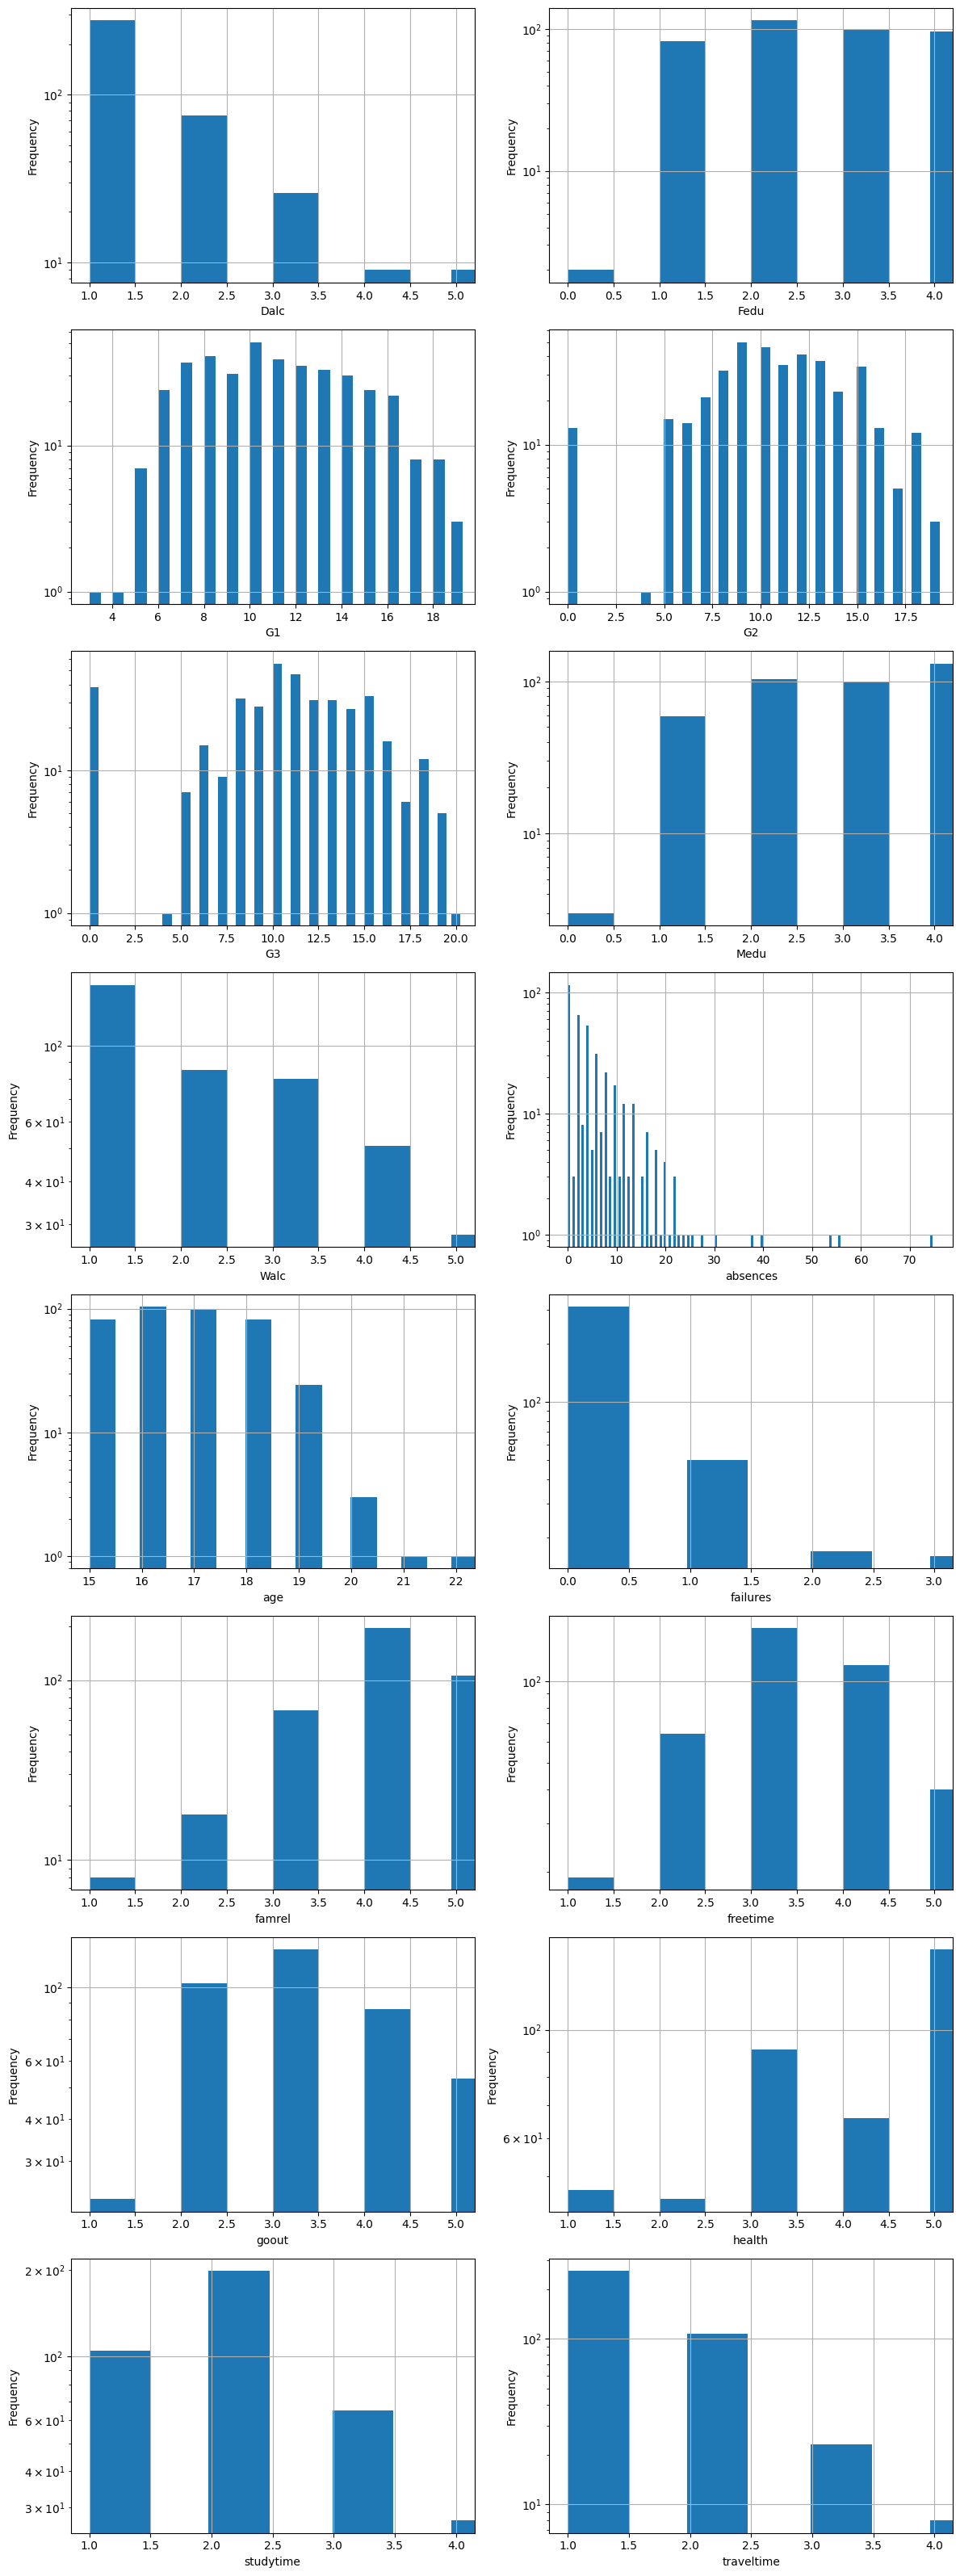

In [125]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] # represents one subplot in the grid.
    #  i // 2 and i % 2 expressions are used to calculate the row and column index of the subplot for the current column.
    data[col].plot.hist(ax=ax, bins=80, logy=True, grid=True , width = 0.5)
    ax.set_xlabel(col)
fig.tight_layout() # to ensure that all of the subplots are properly spaced.

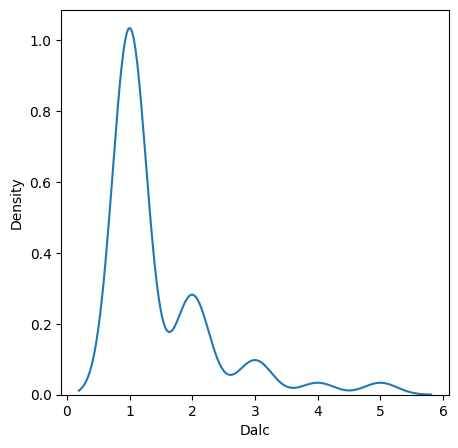

Dalc 
 1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64


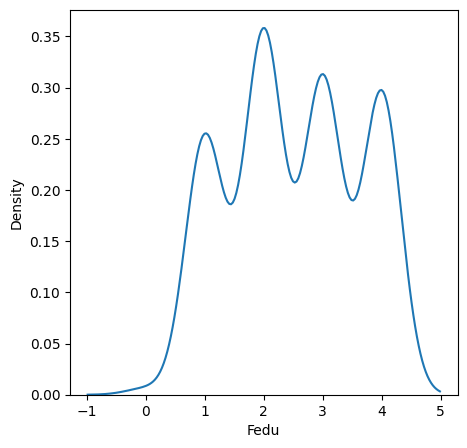

Fedu 
 2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


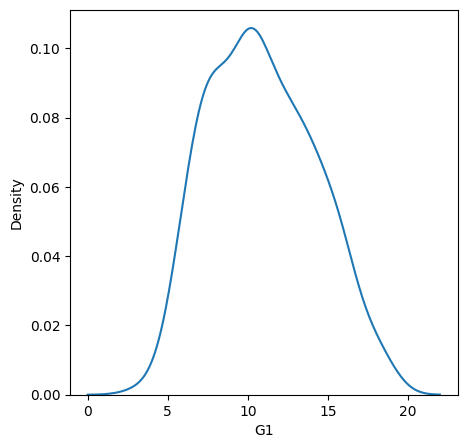

G1 
 10    51
8     41
11    39
7     37
12    35
13    33
9     31
14    30
15    24
6     24
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64


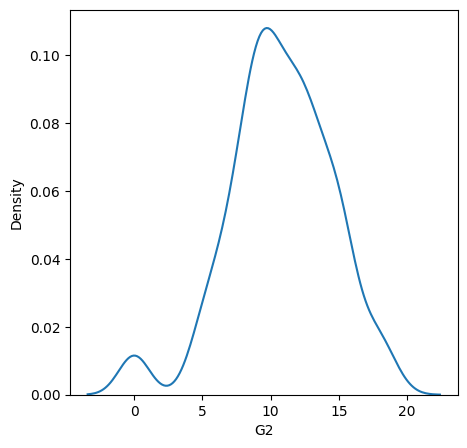

G2 
 9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
16    13
0     13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64


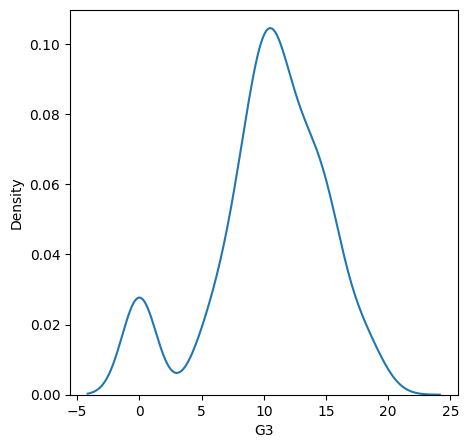

G3 
 10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64


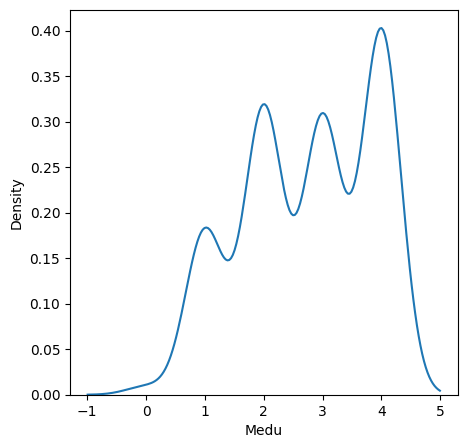

Medu 
 4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


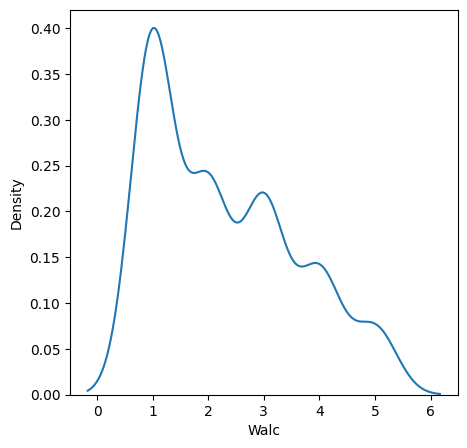

Walc 
 1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64


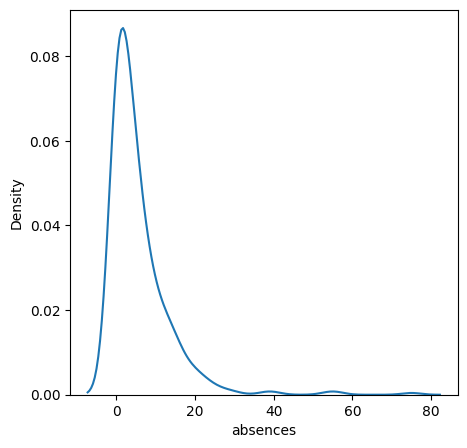

absences 
 0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64


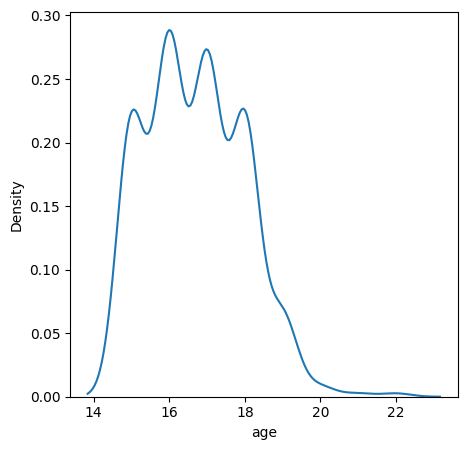

age 
 16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


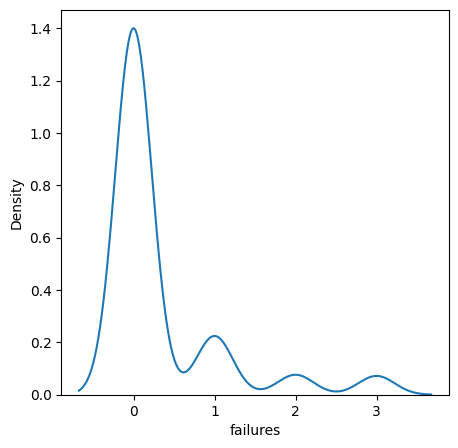

failures 
 0    312
1     50
2     17
3     16
Name: failures, dtype: int64


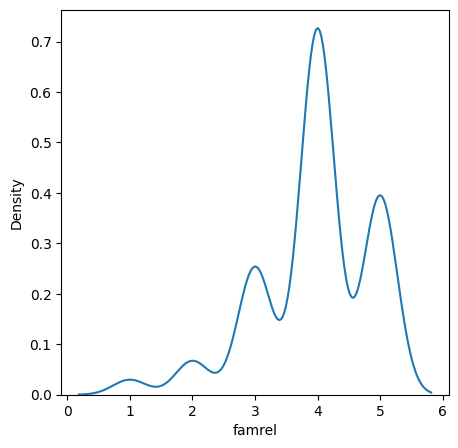

famrel 
 4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64


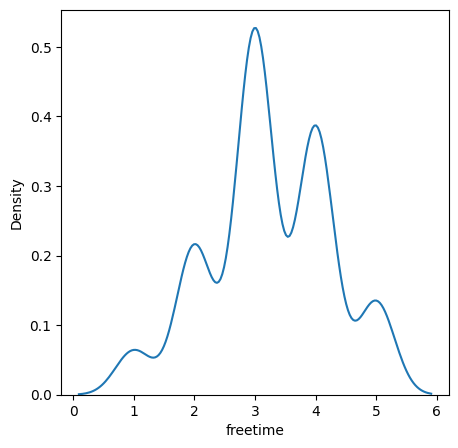

freetime 
 3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64


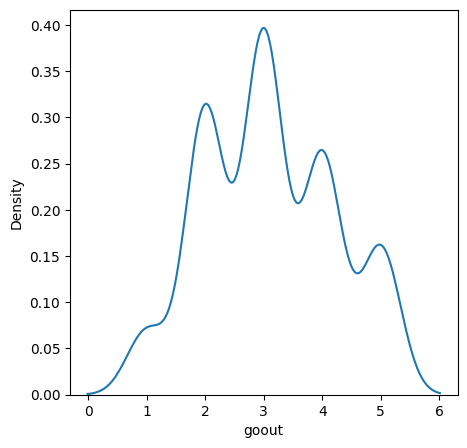

goout 
 3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64


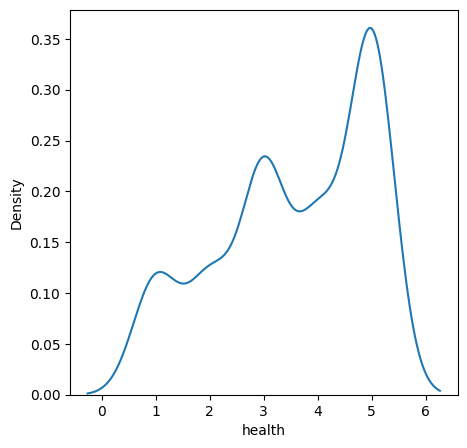

health 
 5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


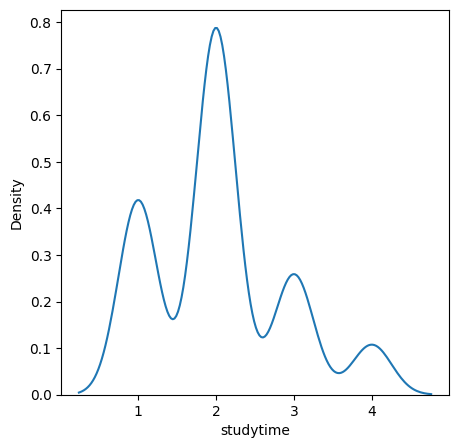

studytime 
 2    198
1    105
3     65
4     27
Name: studytime, dtype: int64


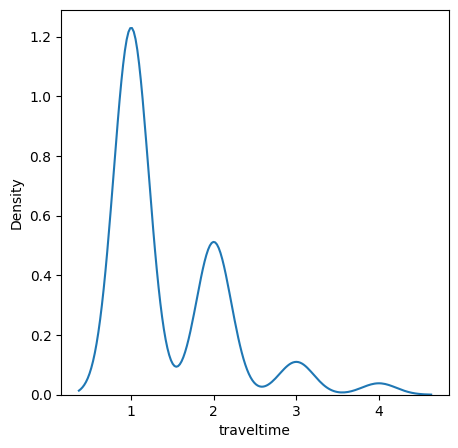

traveltime 
 1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


In [126]:
def hist_plot(col_2):
    plt.figure(figsize=(5, 5))
    sns.kdeplot(data, x=col_2)

    plt.show()
    print(col_2, "\n", data[col_2].value_counts())

# Iterate through numerical columns and plot KDEs
for i in cols_numerical:
    hist_plot(i)

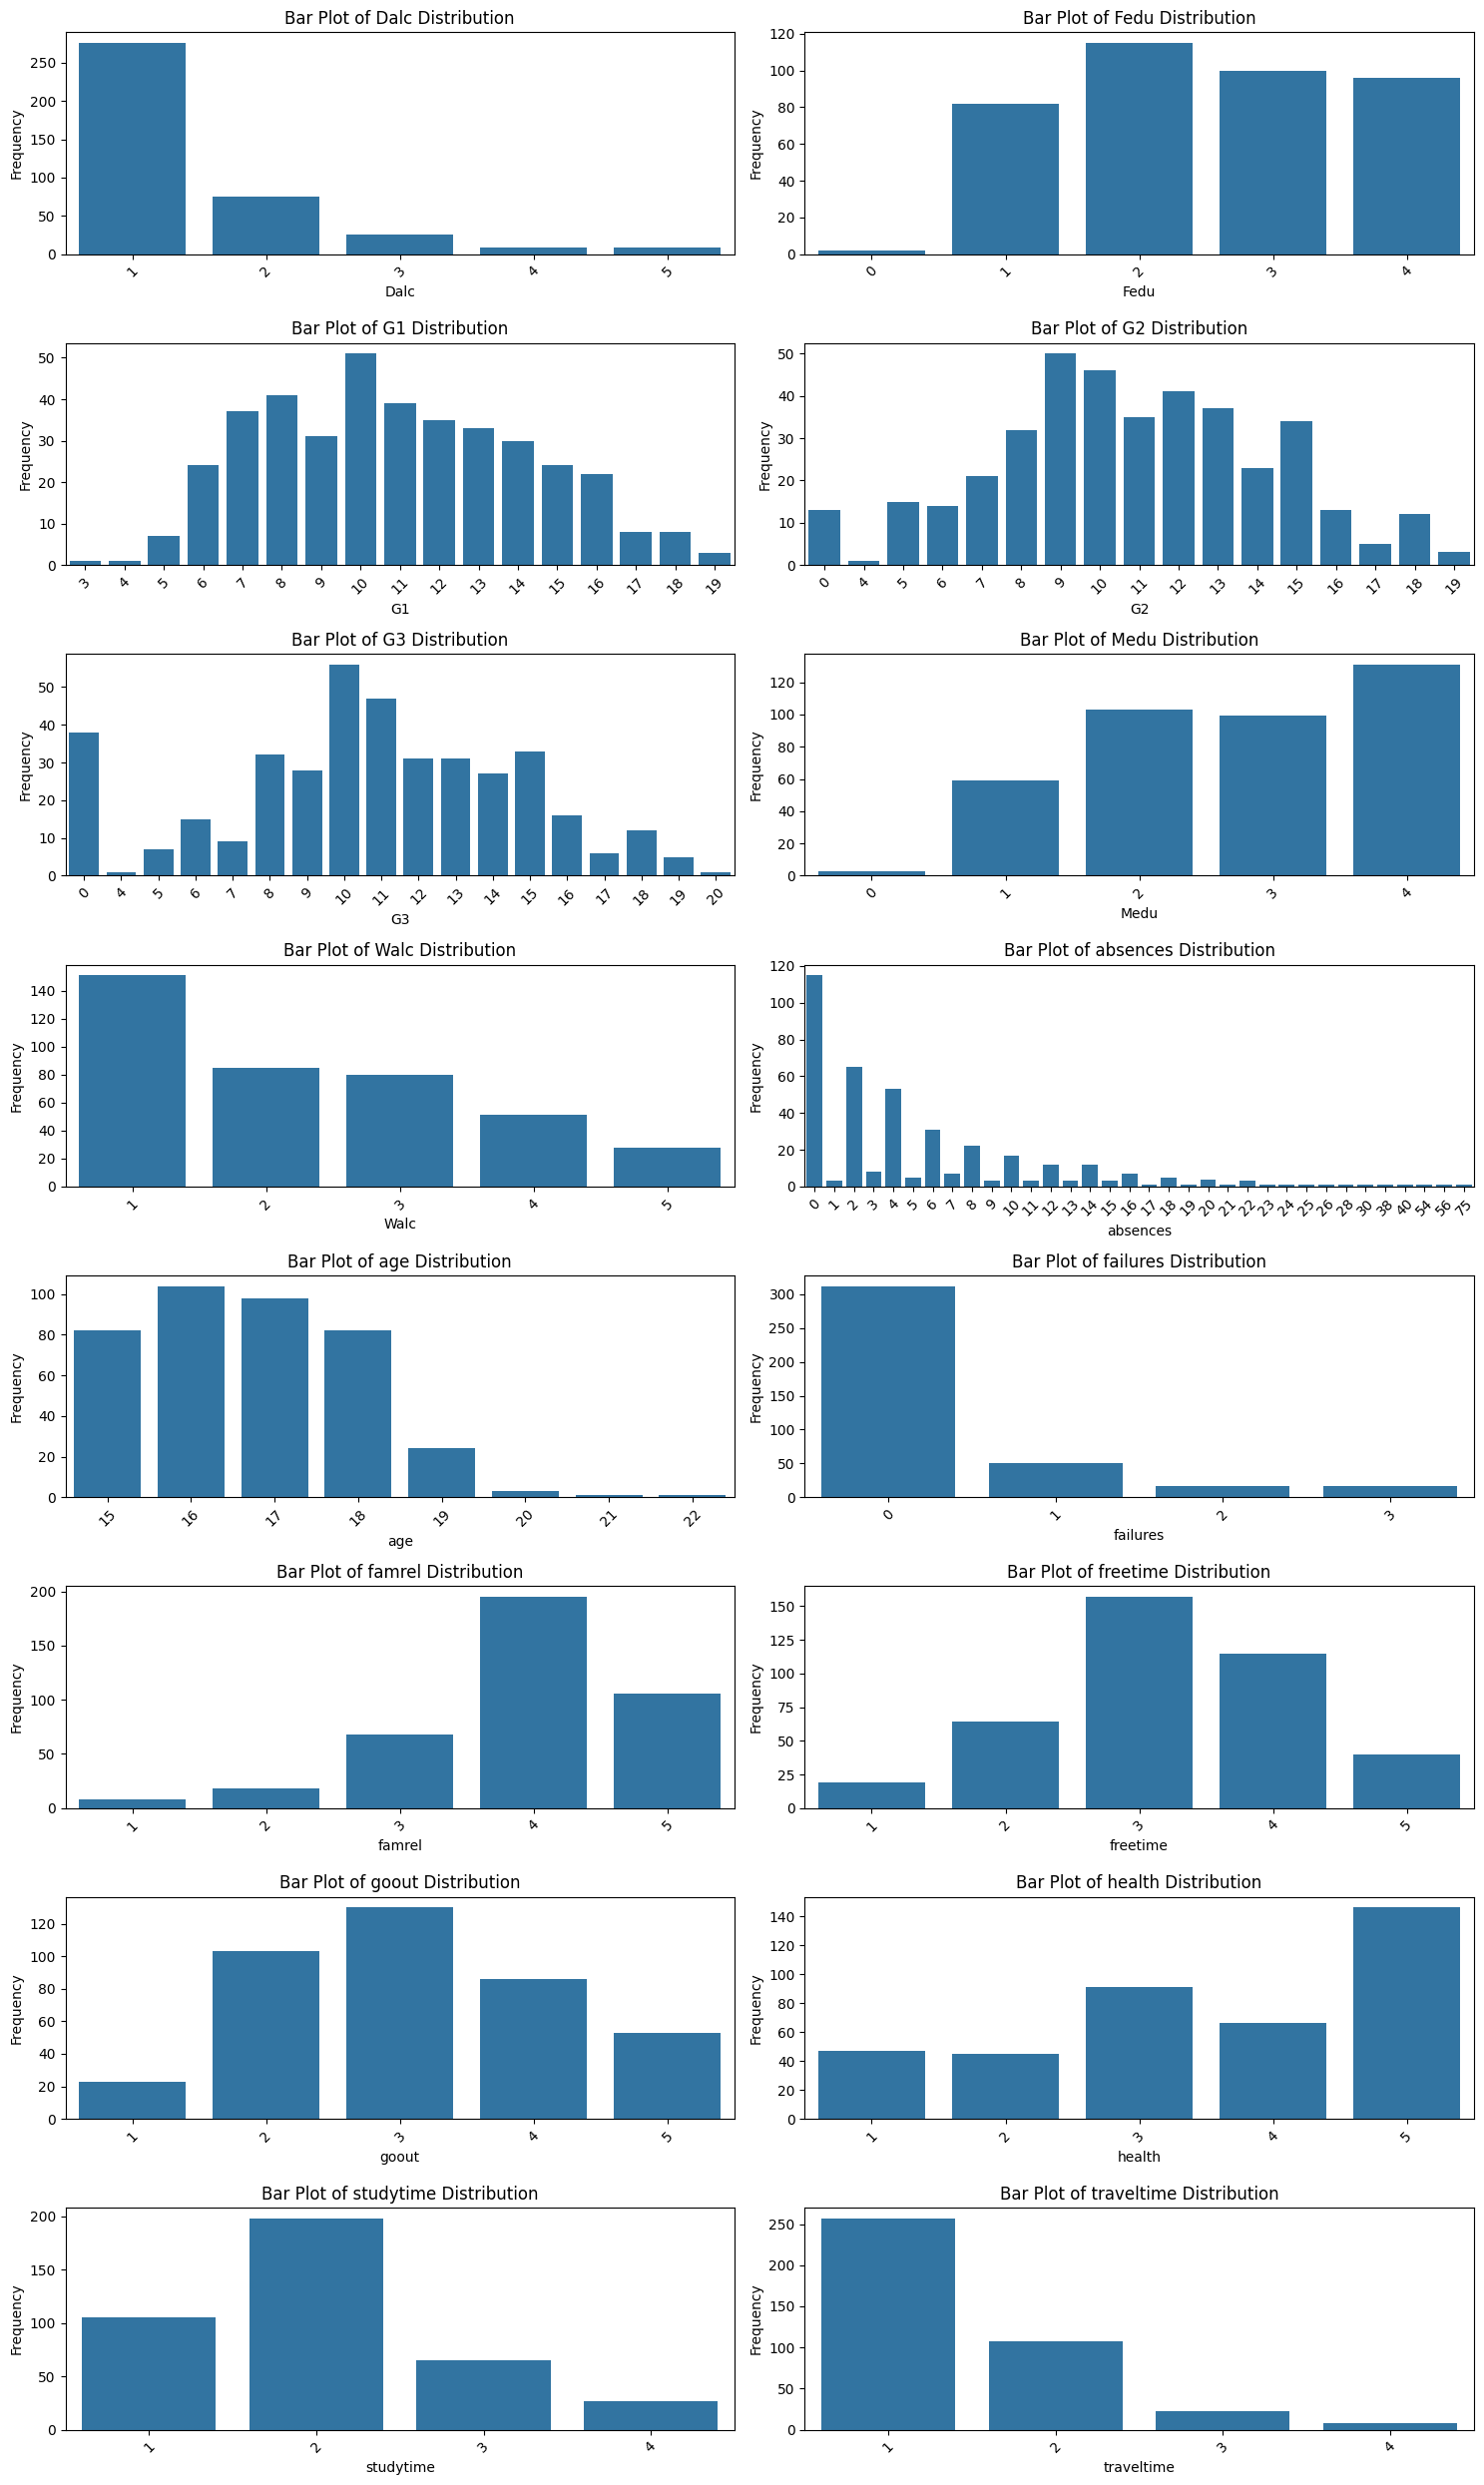

In [127]:
# We will check all the distribution of all the numeric values
n_columns = len(cols_numerical)
n_rows = (n_columns + 1) // 2

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 25))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numeric columns and plot them
for i, column in enumerate(cols_numerical):
    if i < n_columns:
        sns.countplot(data, x=column, ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Bar Plot of {column} Distribution')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
if n_columns < n_rows * 2:
    for j in range(n_columns, n_rows * 2):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Distribution of Predictors**

<ipython-input-128-8300cb28f3b8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], fit = norm)
<ipython-input-128-8300cb28f3b8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i], fit = norm)
<ipython-input-128-8300cb28f3b8>:4: UserWarning: 

`distplot` is a deprecated function and

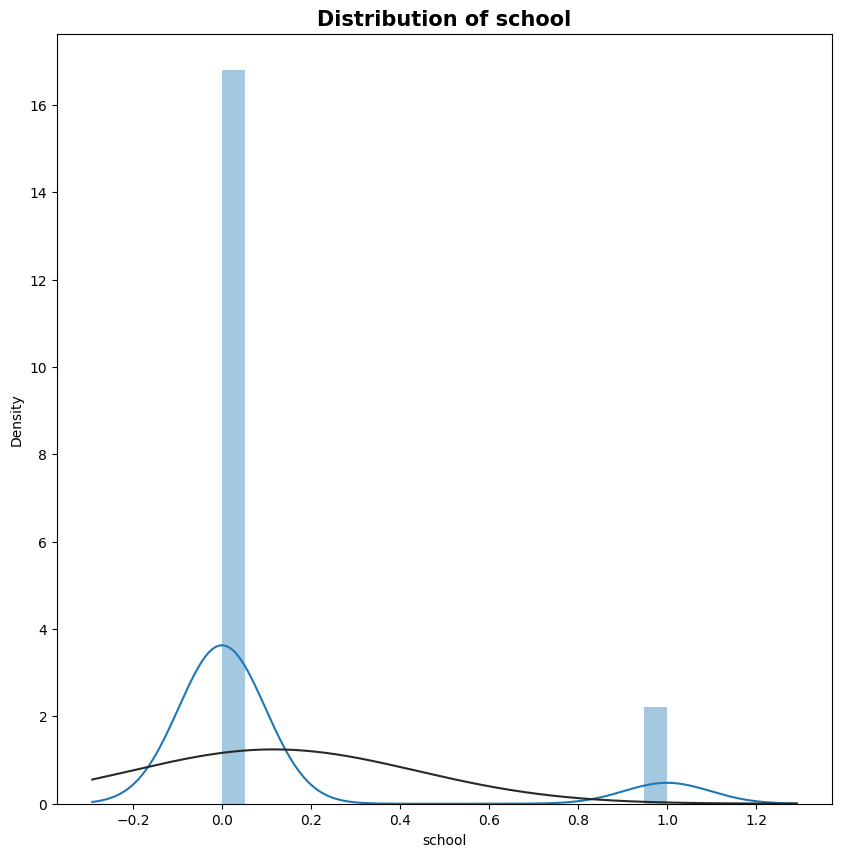

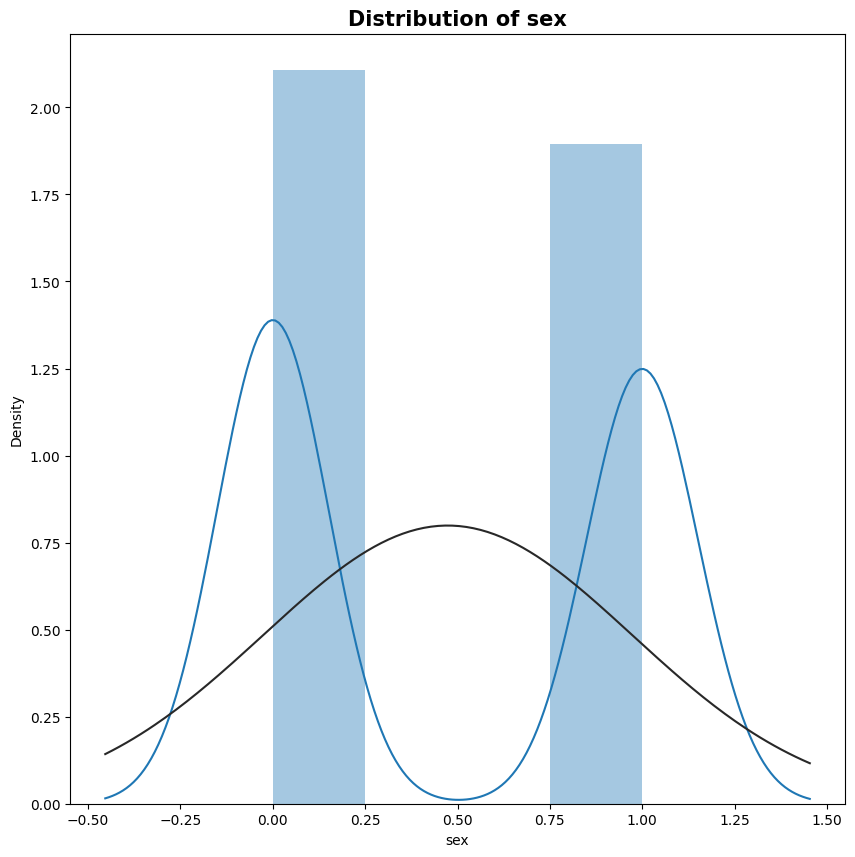

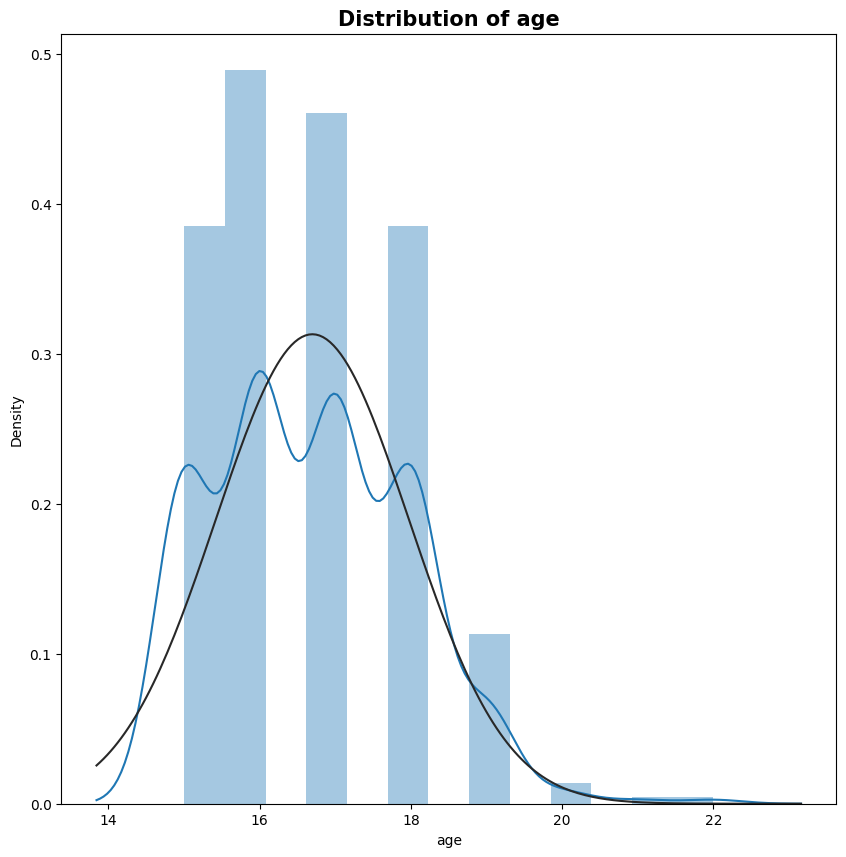

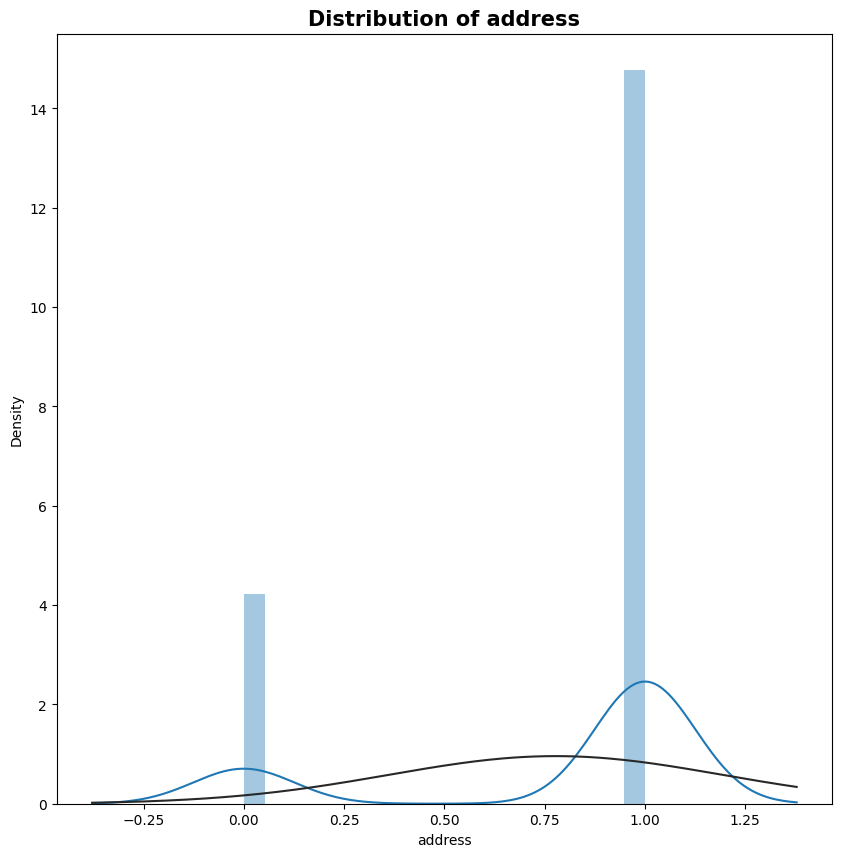

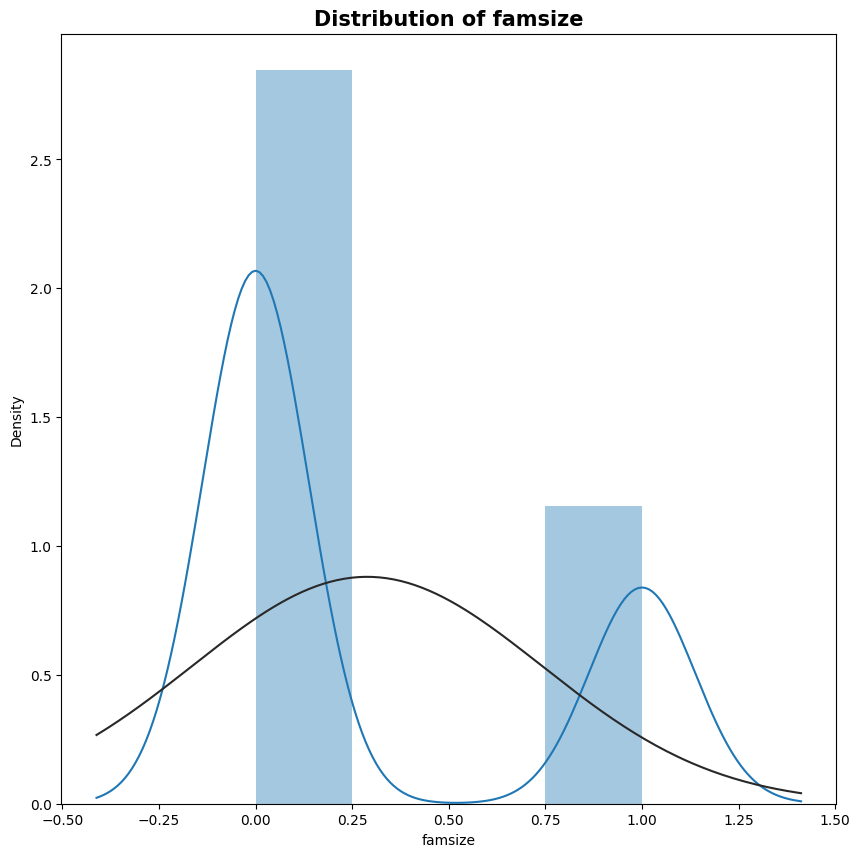

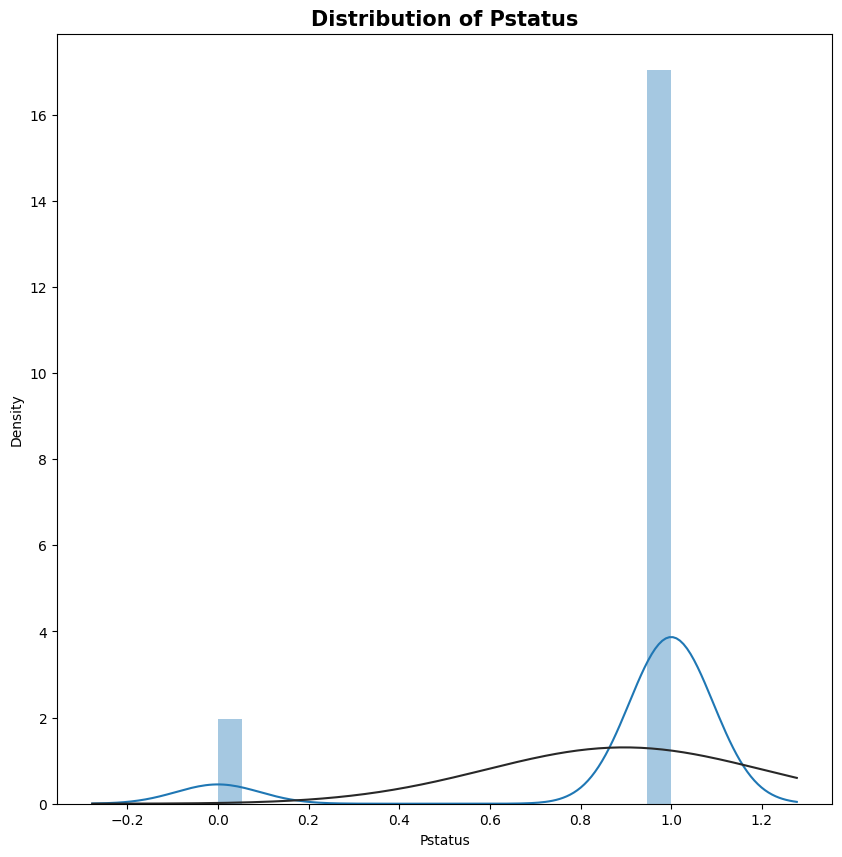

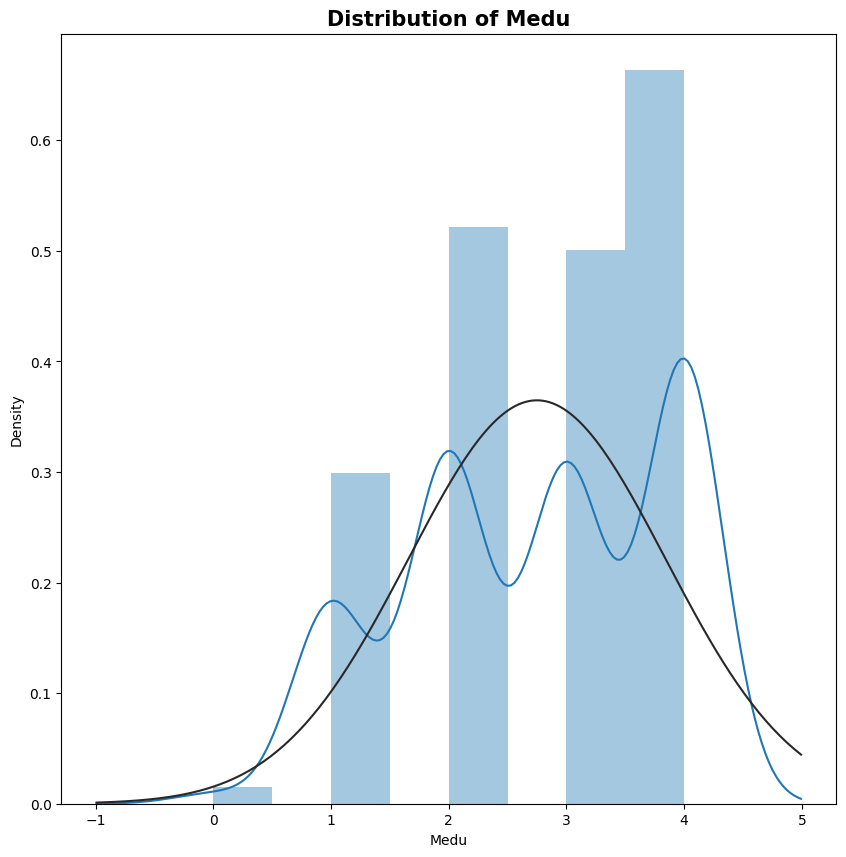

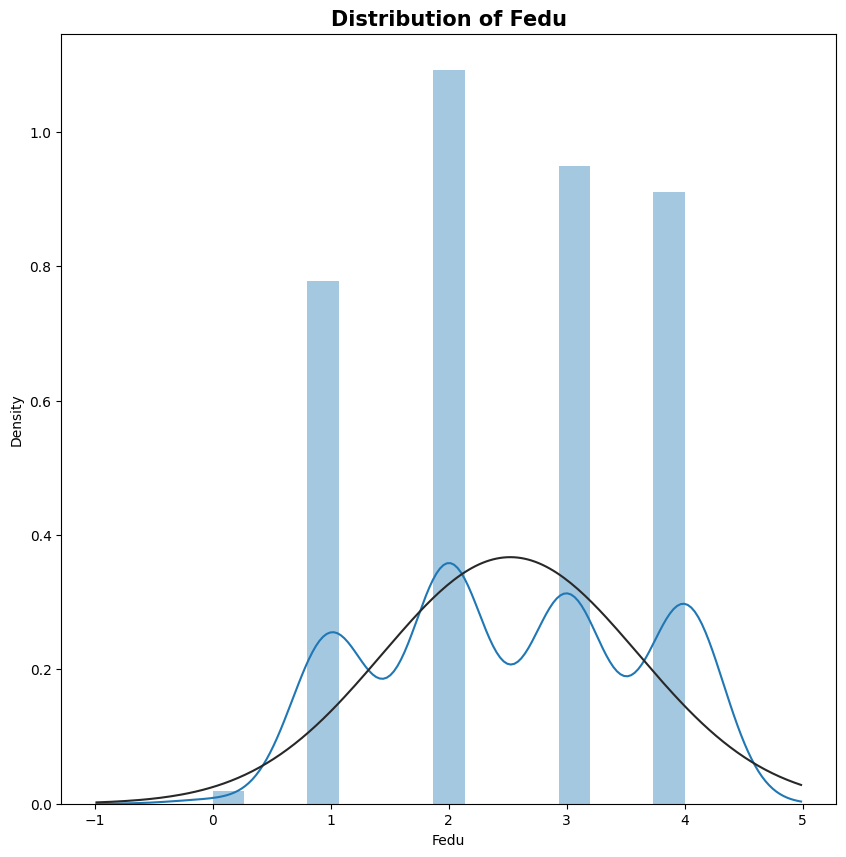

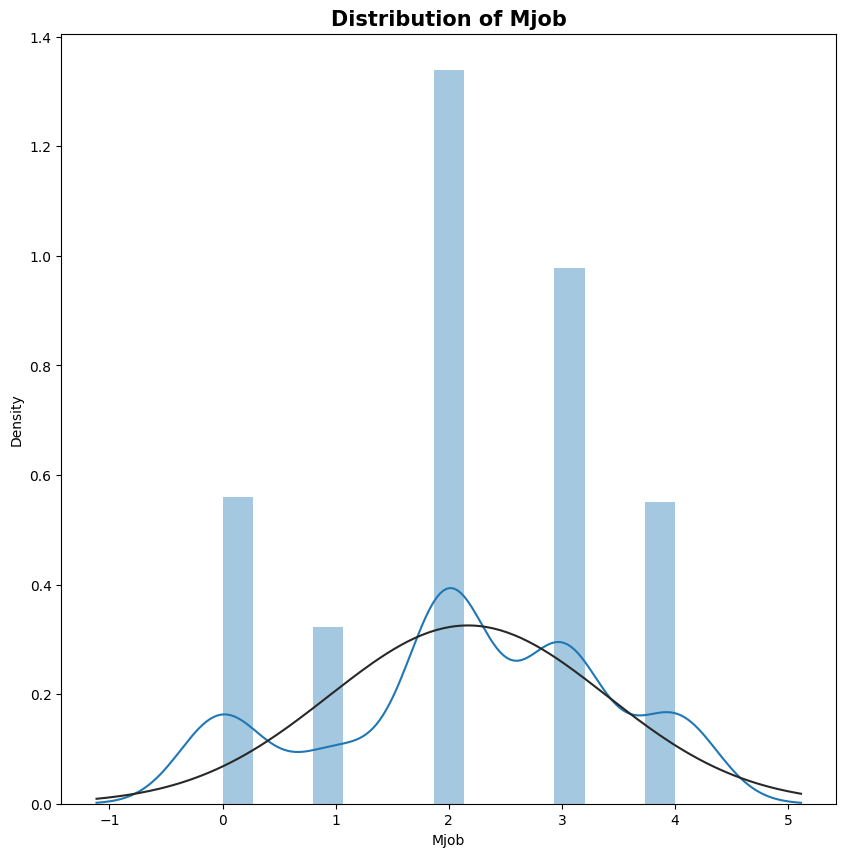

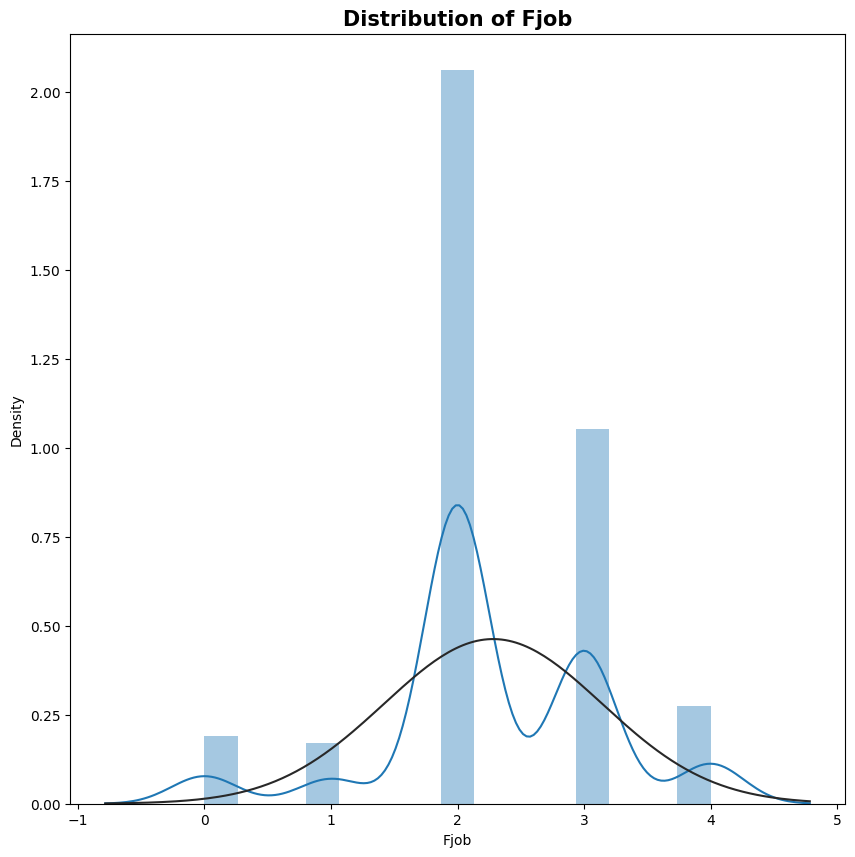

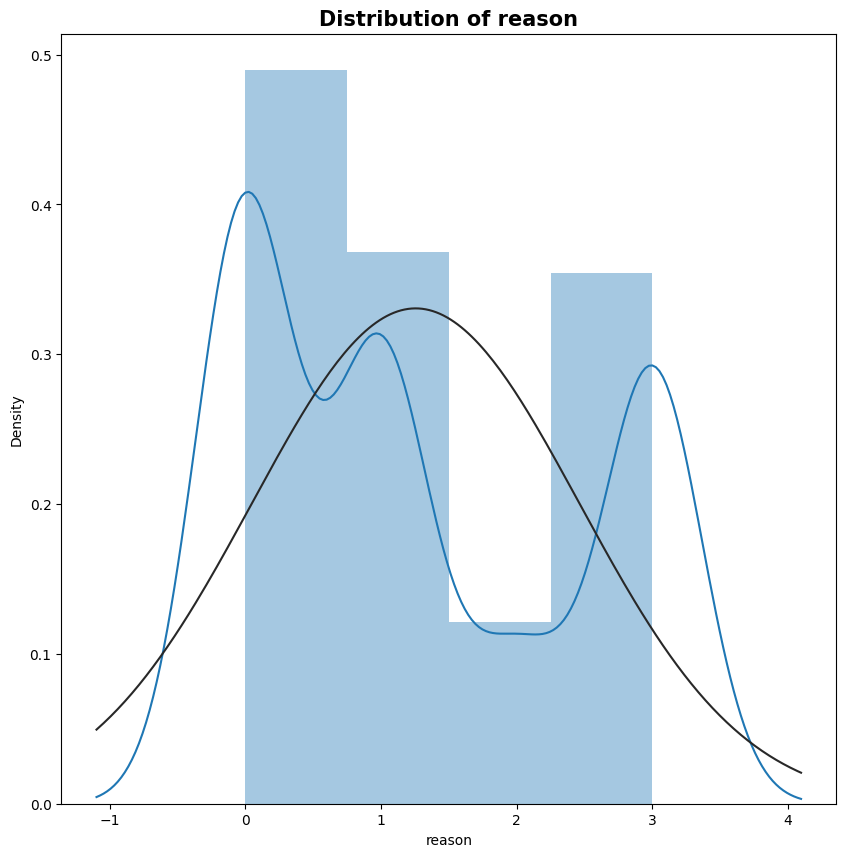

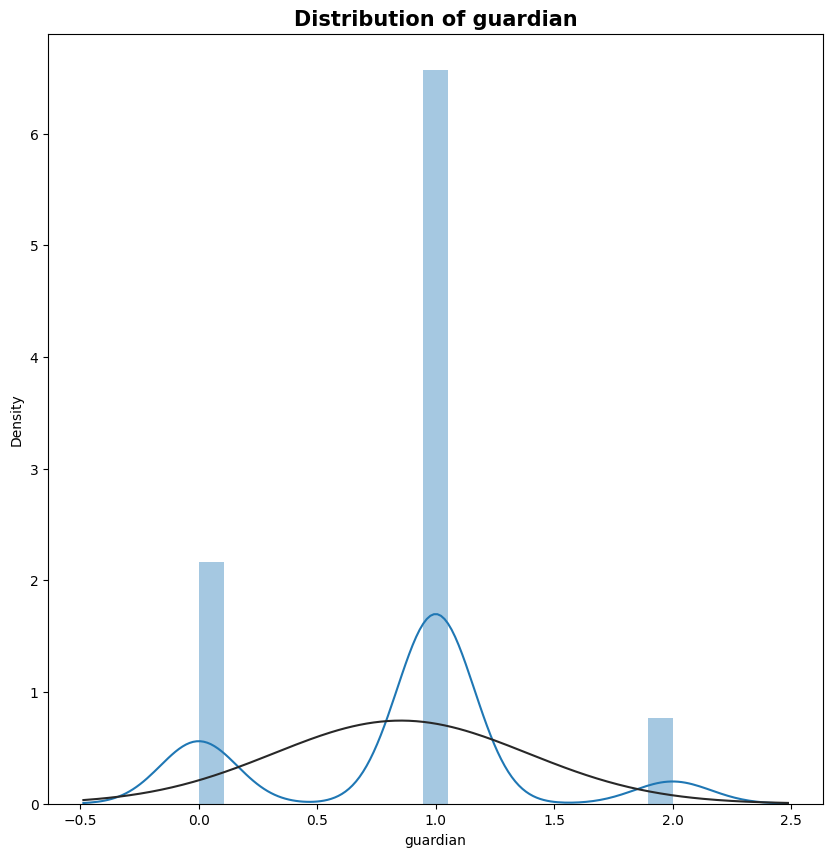

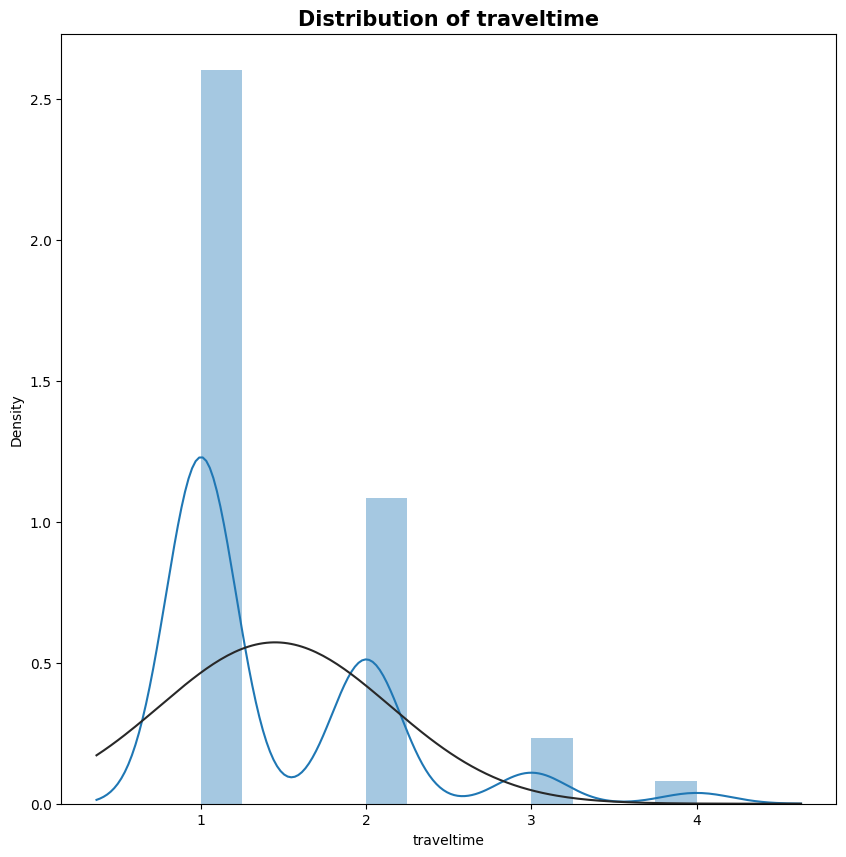

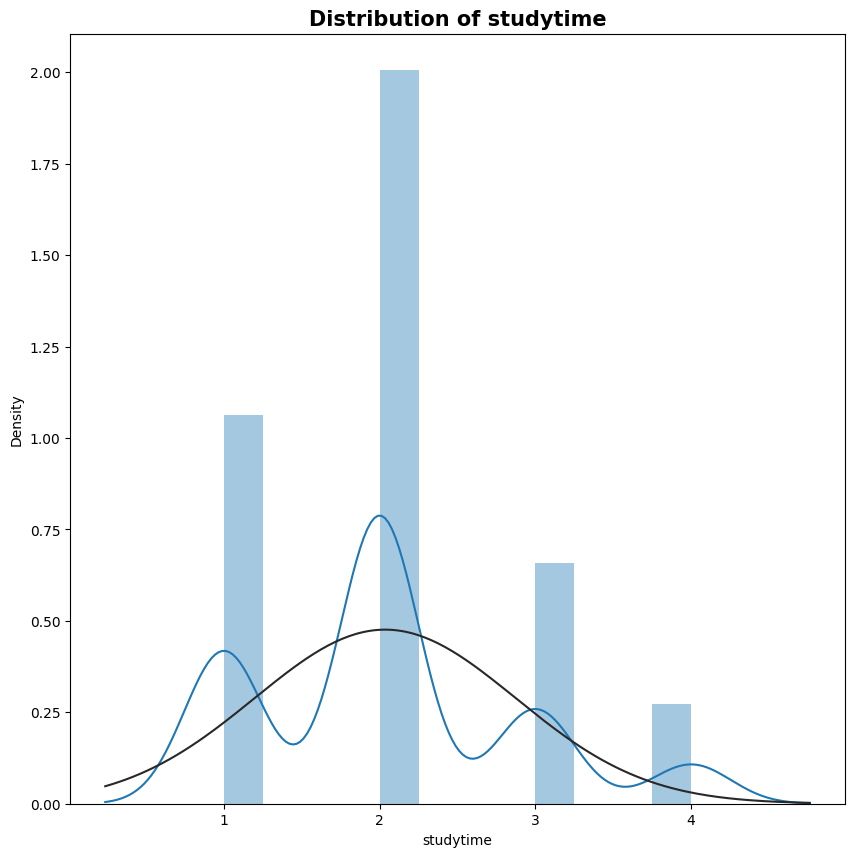

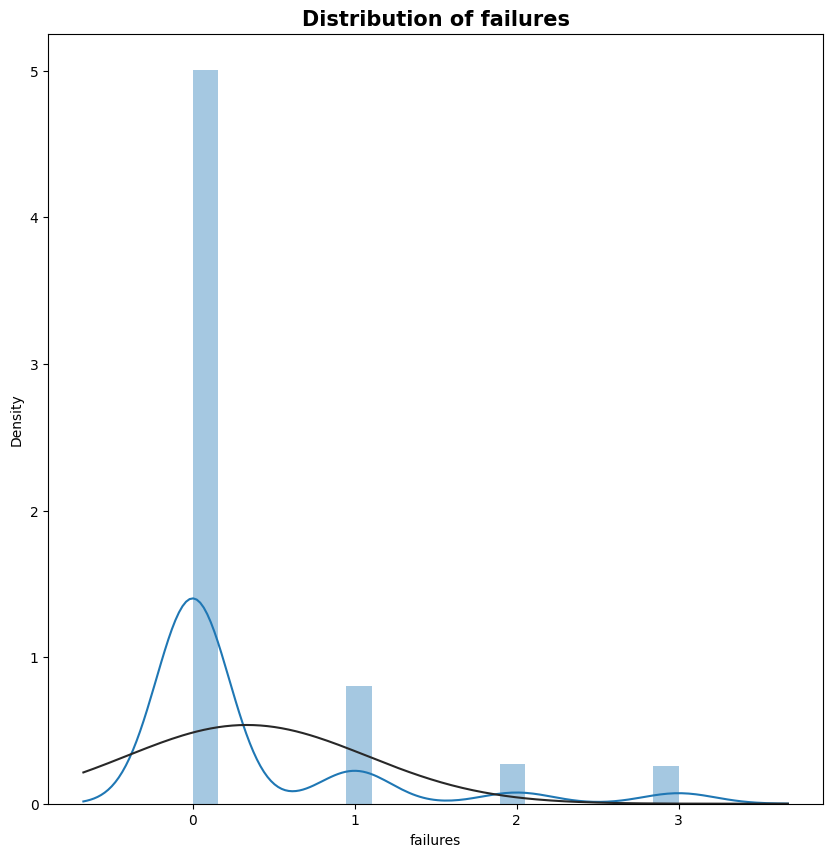

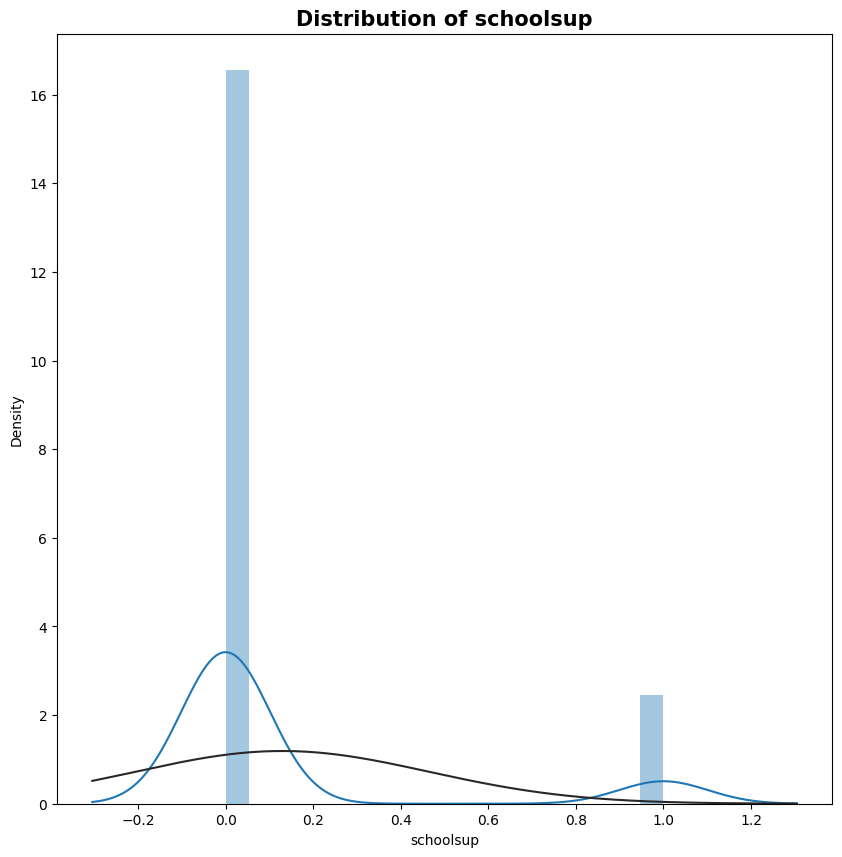

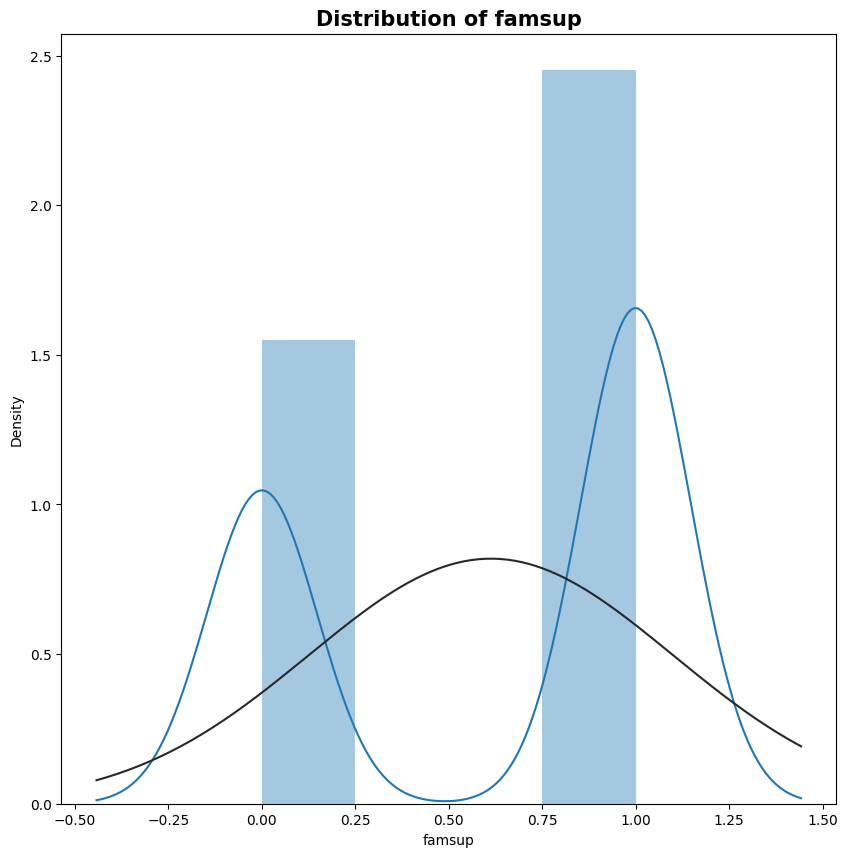

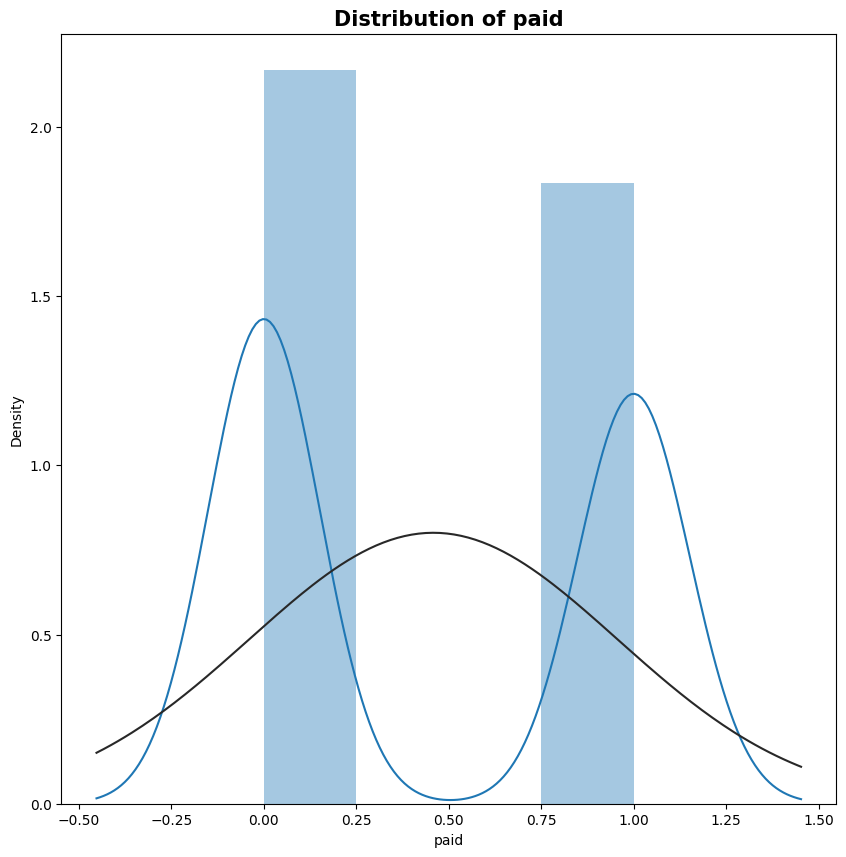

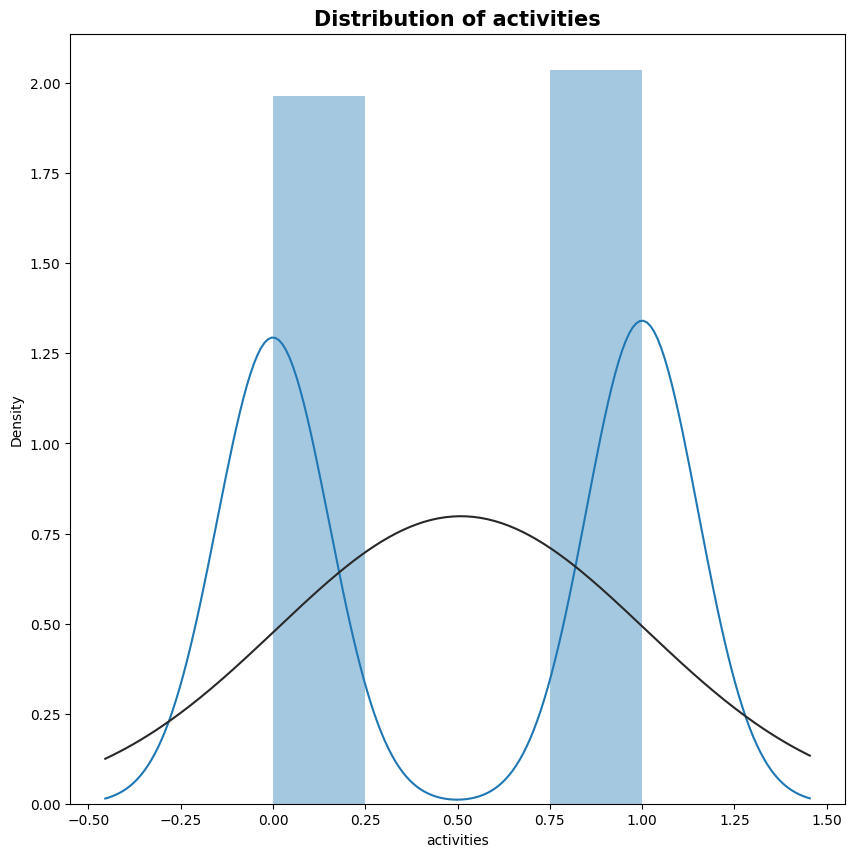

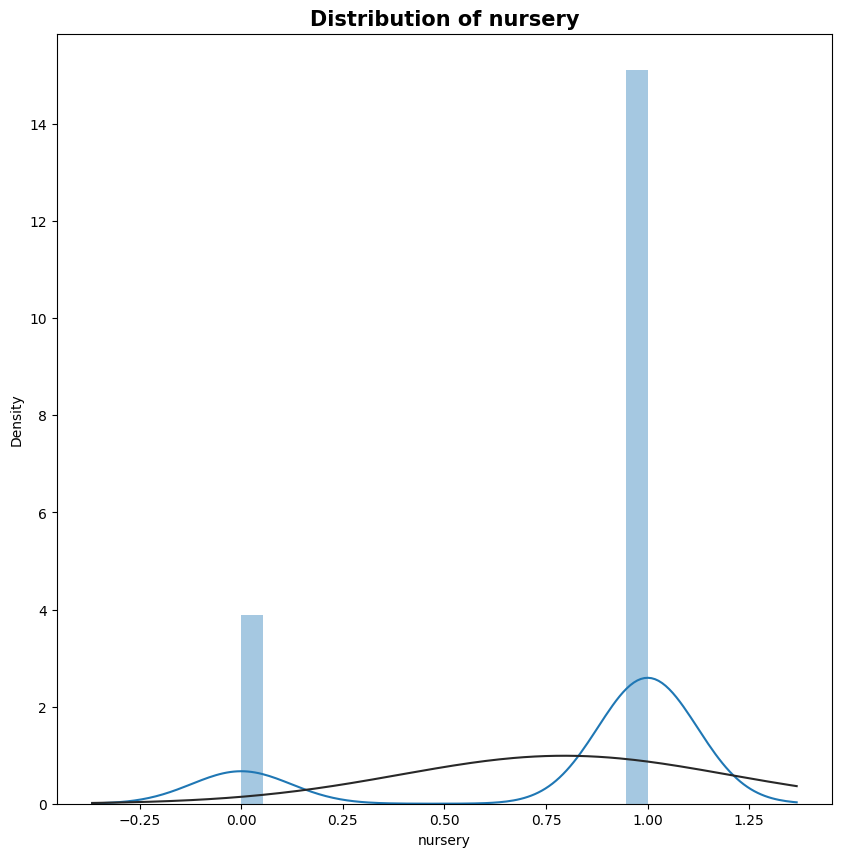

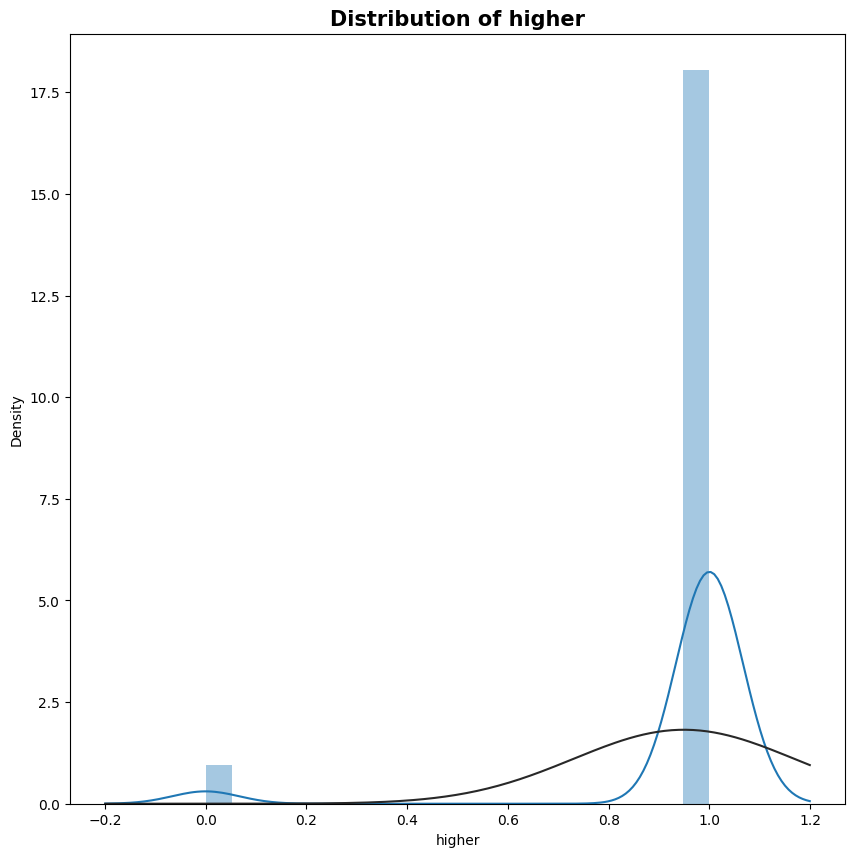

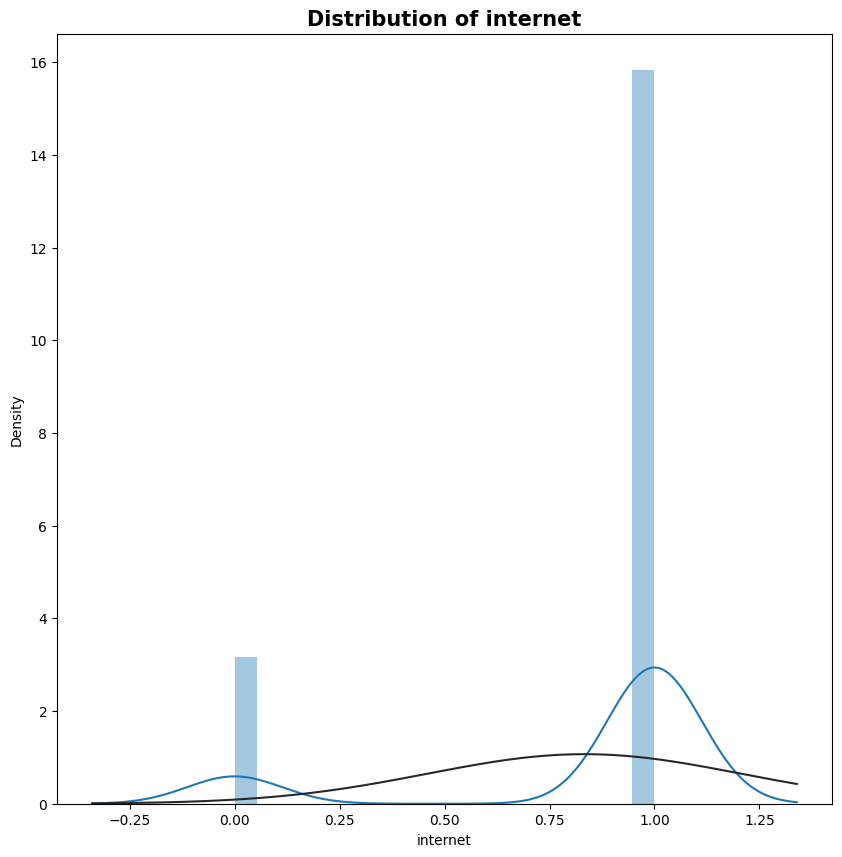

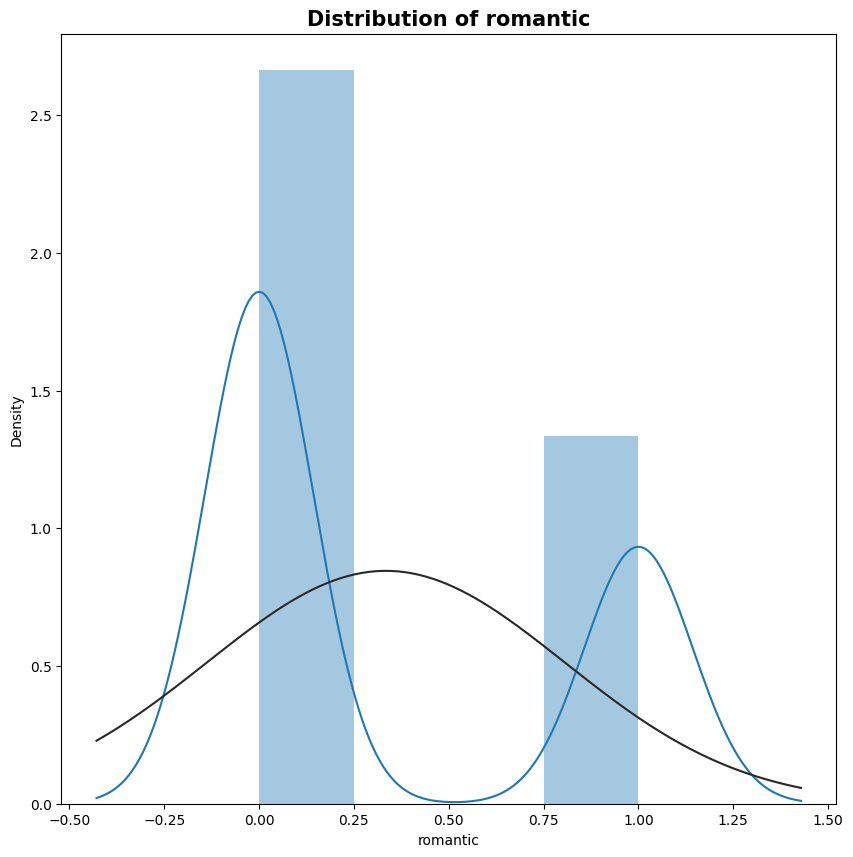

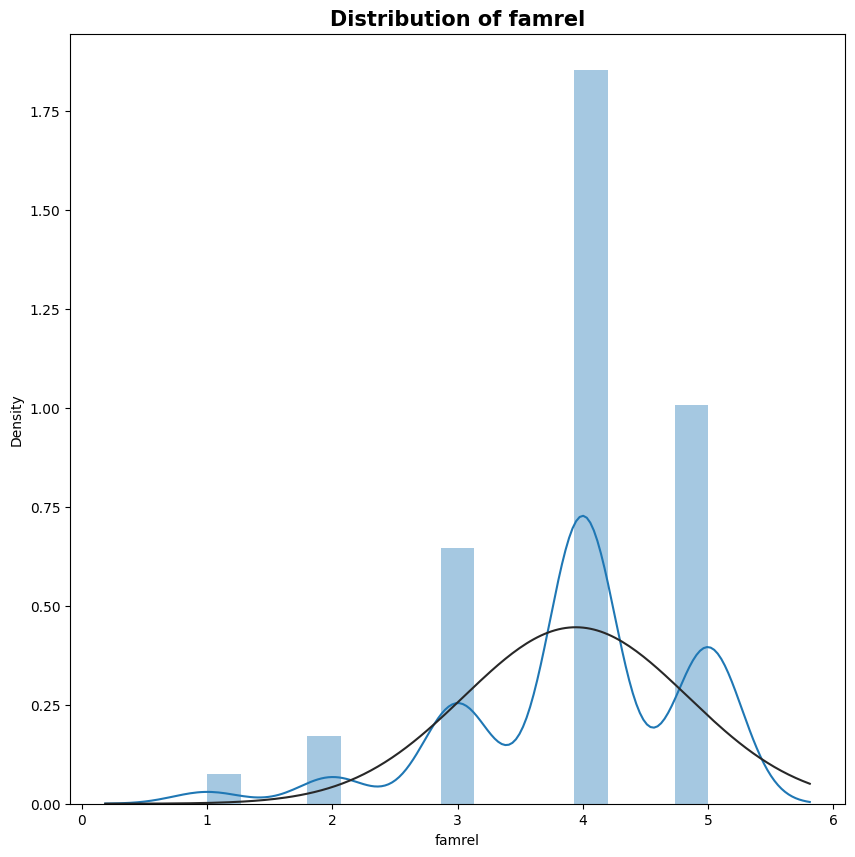

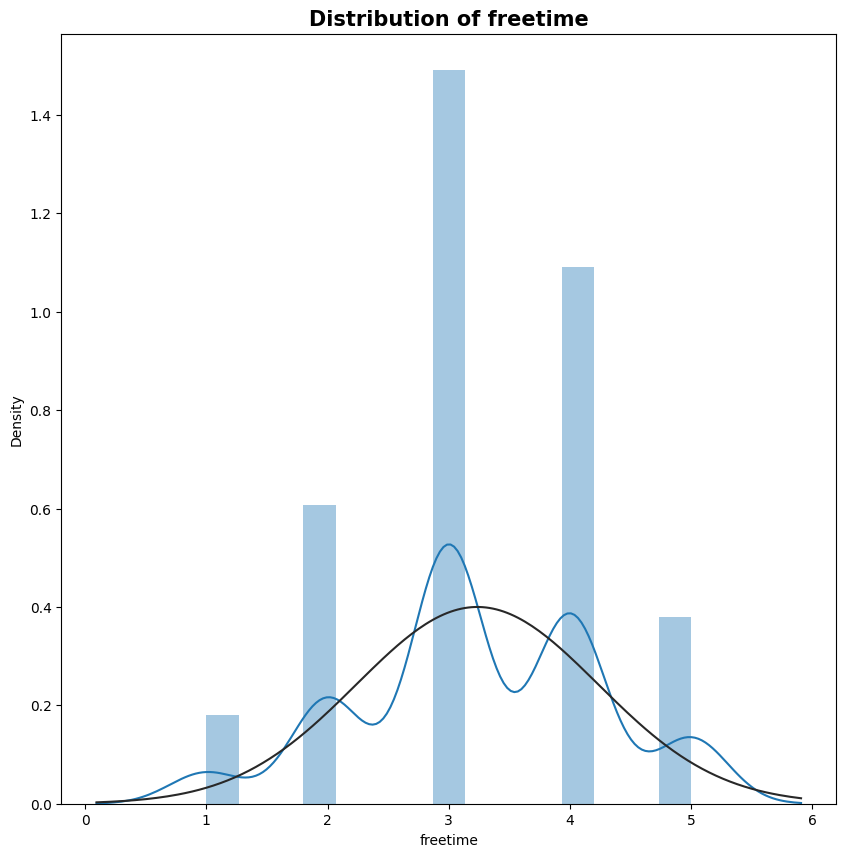

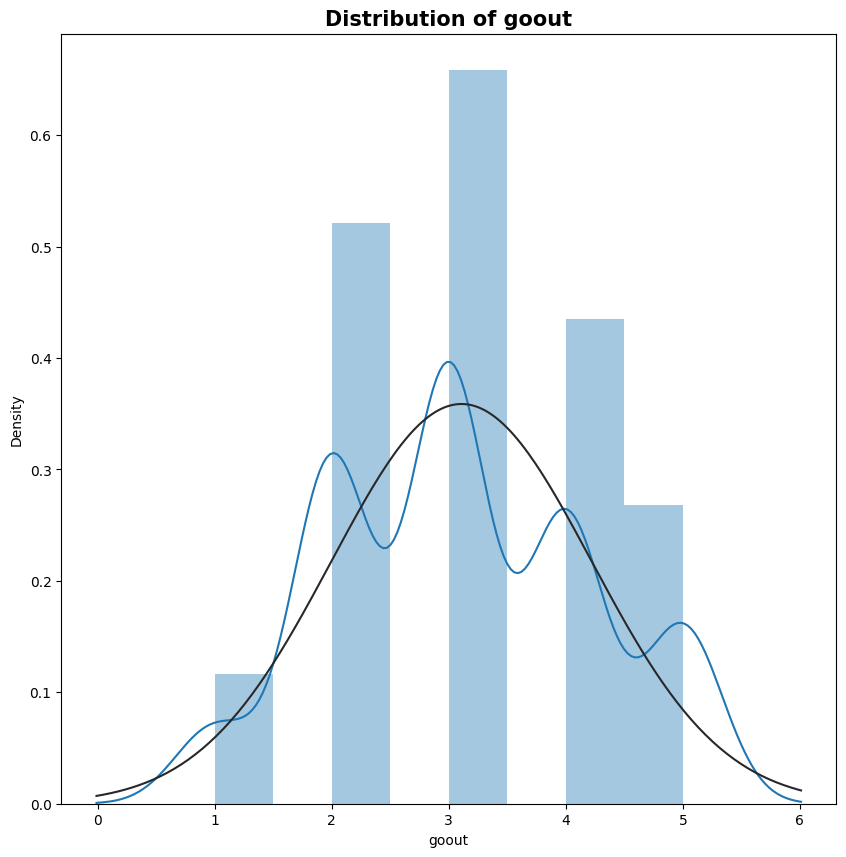

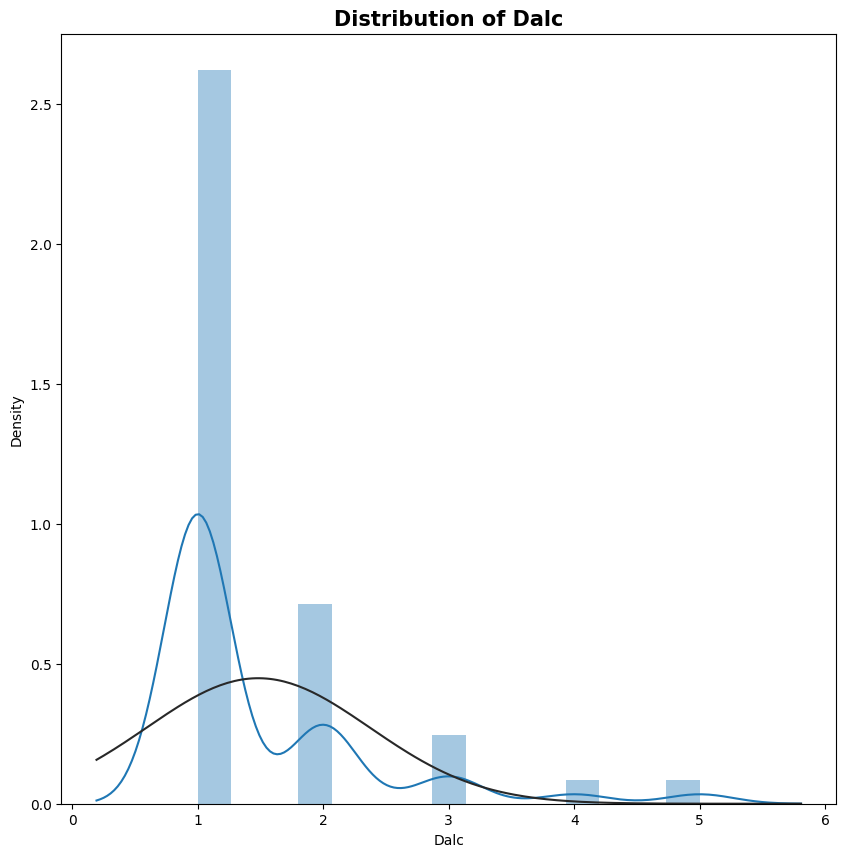

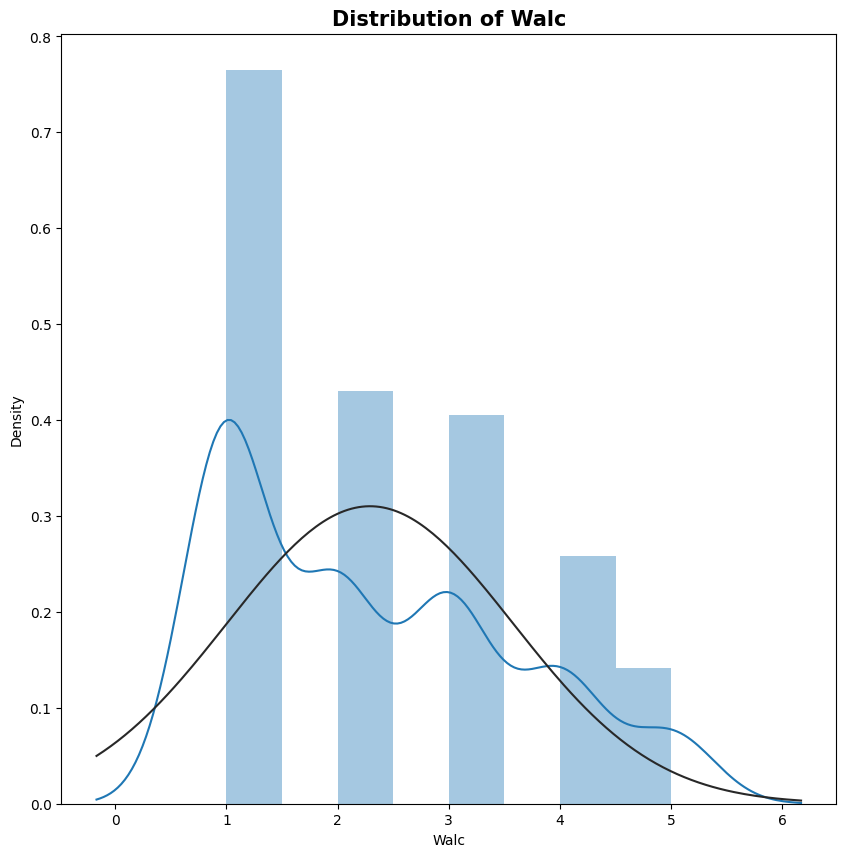

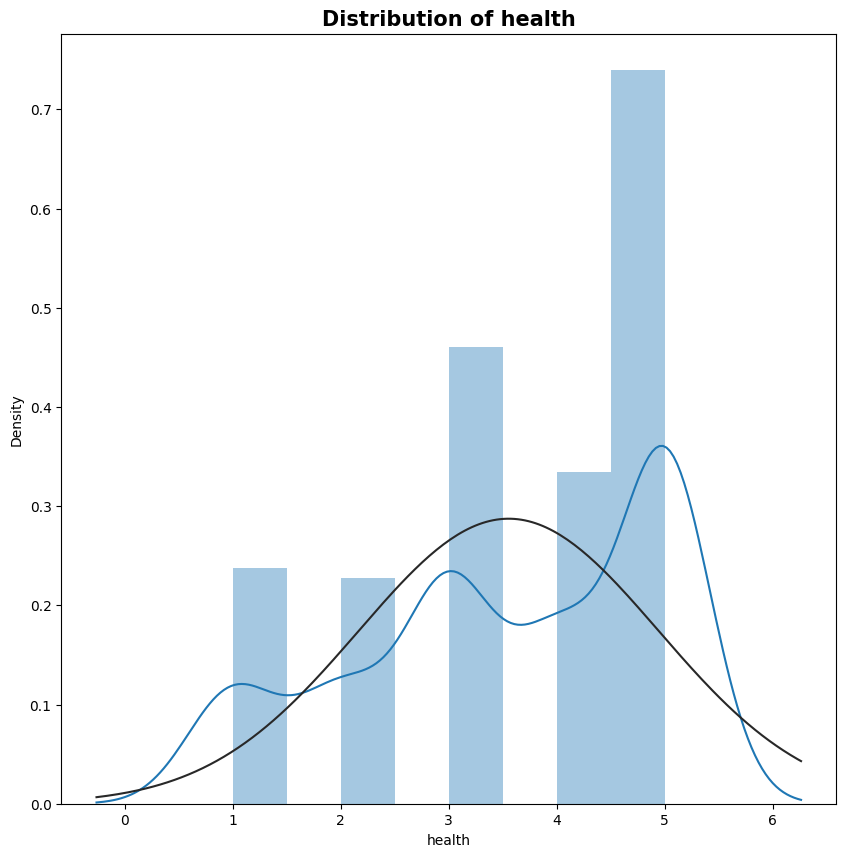

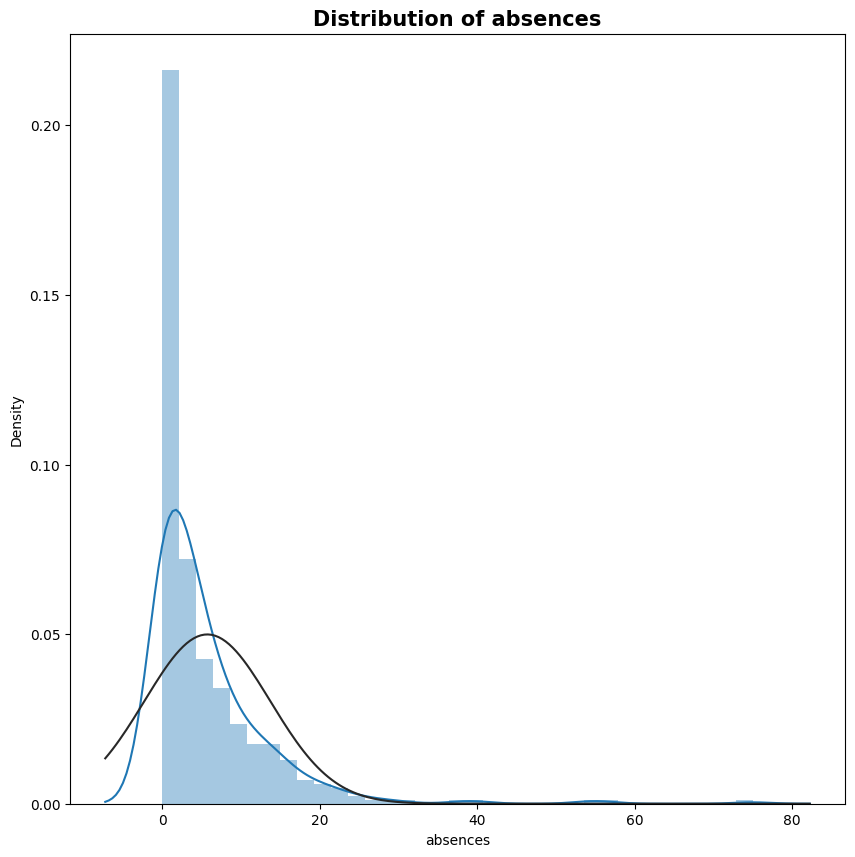

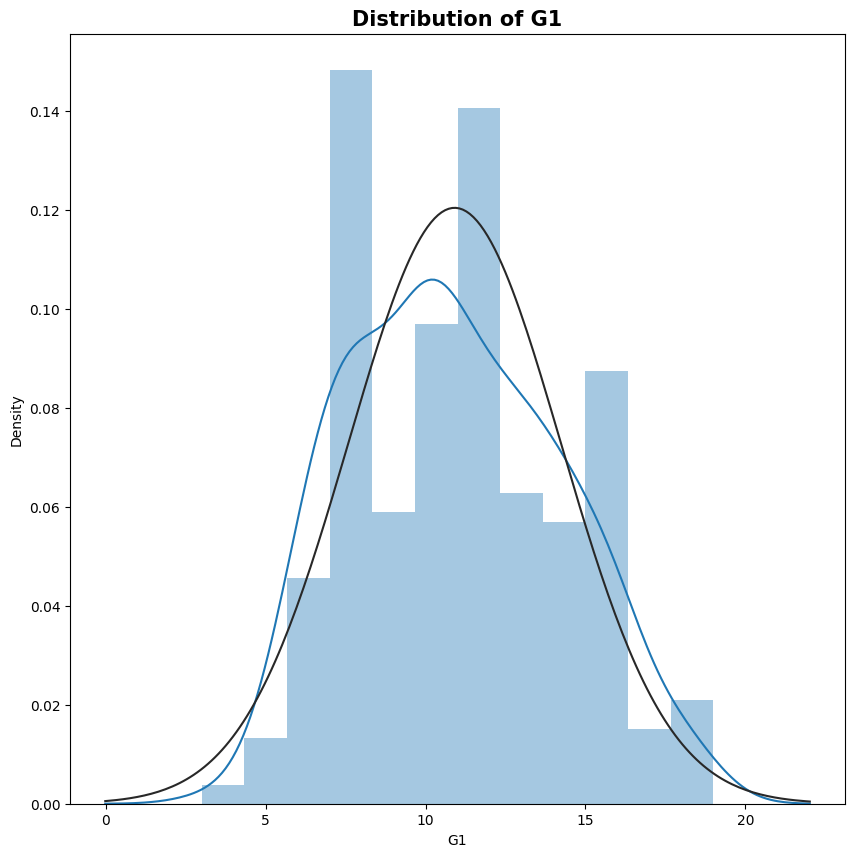

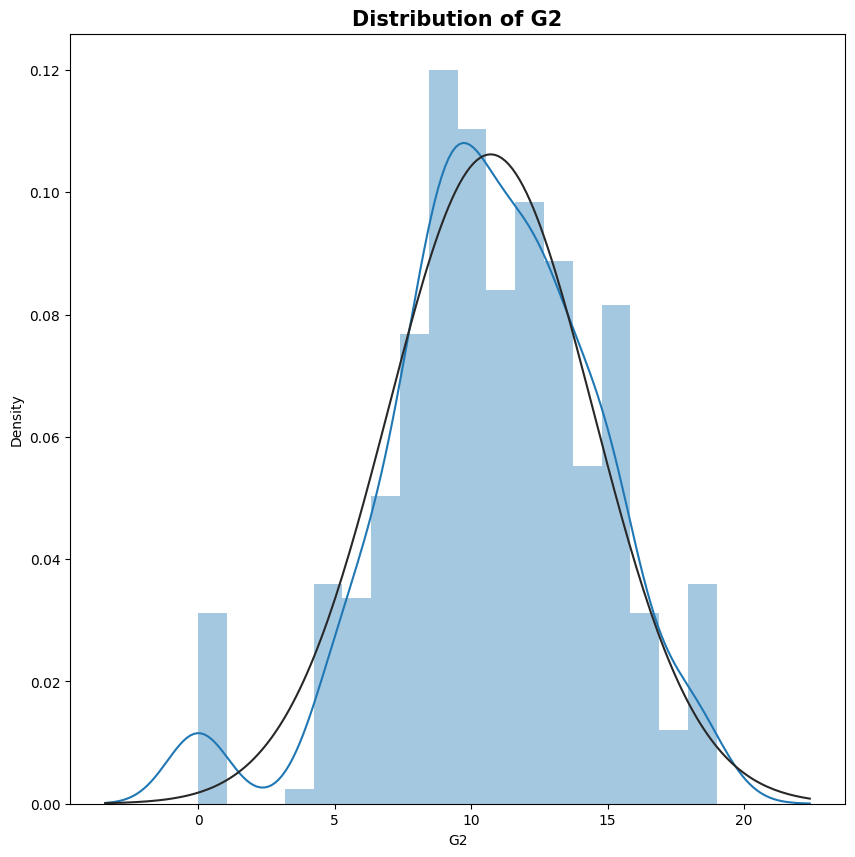

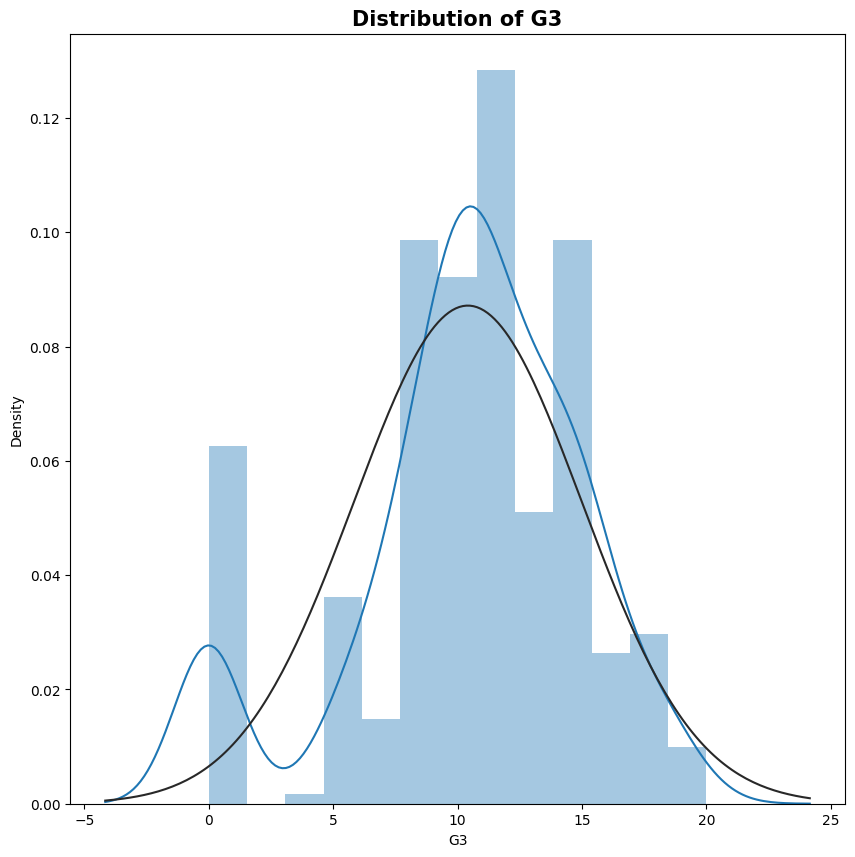

In [128]:
dfColumnList = data.columns
for i in dfColumnList:
  plt.figure(figsize= (10,10))
  sns.distplot(data[i], fit = norm)
  plt.title(f"Distribution of {i}",size = 15, weight = "bold")

# **Do the ranges of the predictor variable makes sense?**

In [129]:
#Range of each column
data.max() - data.min()

school         1
sex            1
age            7
address        1
famsize        1
Pstatus        1
Medu           4
Fedu           4
Mjob           4
Fjob           4
reason         3
guardian       2
traveltime     3
studytime      3
failures       3
schoolsup      1
famsup         1
paid           1
activities     1
nursery        1
higher         1
internet       1
romantic       1
famrel         4
freetime       4
goout          4
Dalc           4
Walc           4
health         4
absences      75
G1            16
G2            19
G3            20
dtype: int64

**The range of "absences" variable is high, this implies high variablity in it's distribution.**

# **In the predictor variables independent of all the other predictor variables?**

**Multicollinearity**

Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In this kernel, multicollinearity will be control with Eigen vector values results.

In [166]:
corr= data.corr(method='pearson')

#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([ 5.47588414e+00,  2.67359137e+00,  2.42198420e+00,  1.78119102e+00,
        1.52653595e+00,  7.77383079e-02,  1.43995146e+00,  1.39845467e+00,
        1.64086869e-01,  2.78099169e-01,  3.01981793e-01,  1.24587250e+00,
        1.19913797e+00,  3.97494921e-01,  1.11606166e+00,  1.07799718e+00,
        4.59593555e-01,  1.01932142e+00,  9.77881186e-01,  9.56810013e-01,
        9.15052483e-01,  4.95538910e-01,  5.37772028e-01,  5.59481652e-01,
        5.95225298e-01,  6.29903777e-01,  6.44607731e-01,  8.45066781e-01,
        7.04809160e-01,  7.17323182e-01,  7.62147402e-01,  8.03712149e-01,
        7.99690103e-01, -8.86368464e-16, -7.48566169e-17])

None of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity in the data.

# **Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

For a regression model, the most useful Independent Variables can be statistically determined using the following methods:

1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap
Each of the following method is applied below to the dataset.

 **1. Univariate Selection**

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:33]
y = data.iloc[:,-1]
y=y.astype('int')
# y = pd.DataFrame(y)
y.head(10)
y.describe()

count    395.000000
mean      10.349367
std        3.697230
min        1.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       19.000000
Name: AvgGrade, dtype: float64

In [168]:
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 33)
fit = bestFeatures.fit(X,y)

In [169]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [170]:
#Conact two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores

Specs       Score
0       school    8.185334
1          sex    9.116276
2          age    2.402834
3      address    4.810406
4      famsize   11.251616
5      Pstatus    3.003854
6         Medu   11.540652
7         Fedu    9.601979
8         Mjob   14.205824
9         Fjob    8.139443
10      reason   29.142413
11    guardian    5.467990
12  traveltime    5.656866
13   studytime    7.932280
14    failures  162.216863
15   schoolsup   35.845249
16      famsup    6.547482
17        paid   22.704444
18  activities    9.274603
19     nursery    2.562848
20      higher    1.910757
21    internet    3.734439
22    romantic   12.114892
23      famrel    3.972835
24    freetime    3.096372
25       goout   10.989489
26        Dalc   11.316636
27        Walc   13.738274
28      health   12.264731
29    absences  362.345534
30          G1  356.110265
31          G2  492.689772
32          G3  751.254887

In [171]:
#Ordering methods from highest importance to lowest
print(featureScores.nlargest(10,'Score'))

        Specs       Score
32         G3  751.254887
31         G2  492.689772
29   absences  362.345534
30         G1  356.110265
14   failures  162.216863
15  schoolsup   35.845249
10     reason   29.142413
17       paid   22.704444
8        Mjob   14.205824
27       Walc   13.738274


**2. Feature Importance**

In [172]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [173]:
print(model.feature_importances_)

[0.00839535 0.01804099 0.03008439 0.01504816 0.02021788 0.01260683
 0.02664275 0.02647698 0.0281925  0.02644036 0.03021001 0.01981321
 0.02008792 0.02562477 0.01782269 0.01312221 0.01886071 0.01790777
 0.02059807 0.01657147 0.00542486 0.01406993 0.02000705 0.02764309
 0.02736982 0.02814217 0.01917074 0.02924282 0.02753582 0.030582
 0.10528033 0.12909572 0.12367066]


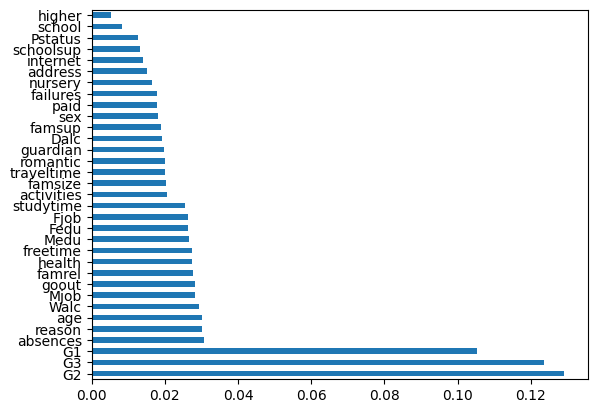

In [174]:
#Plot graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(33).plot(kind = 'barh')
plt.show()

**3. Correlation Matrix with HeatMap**

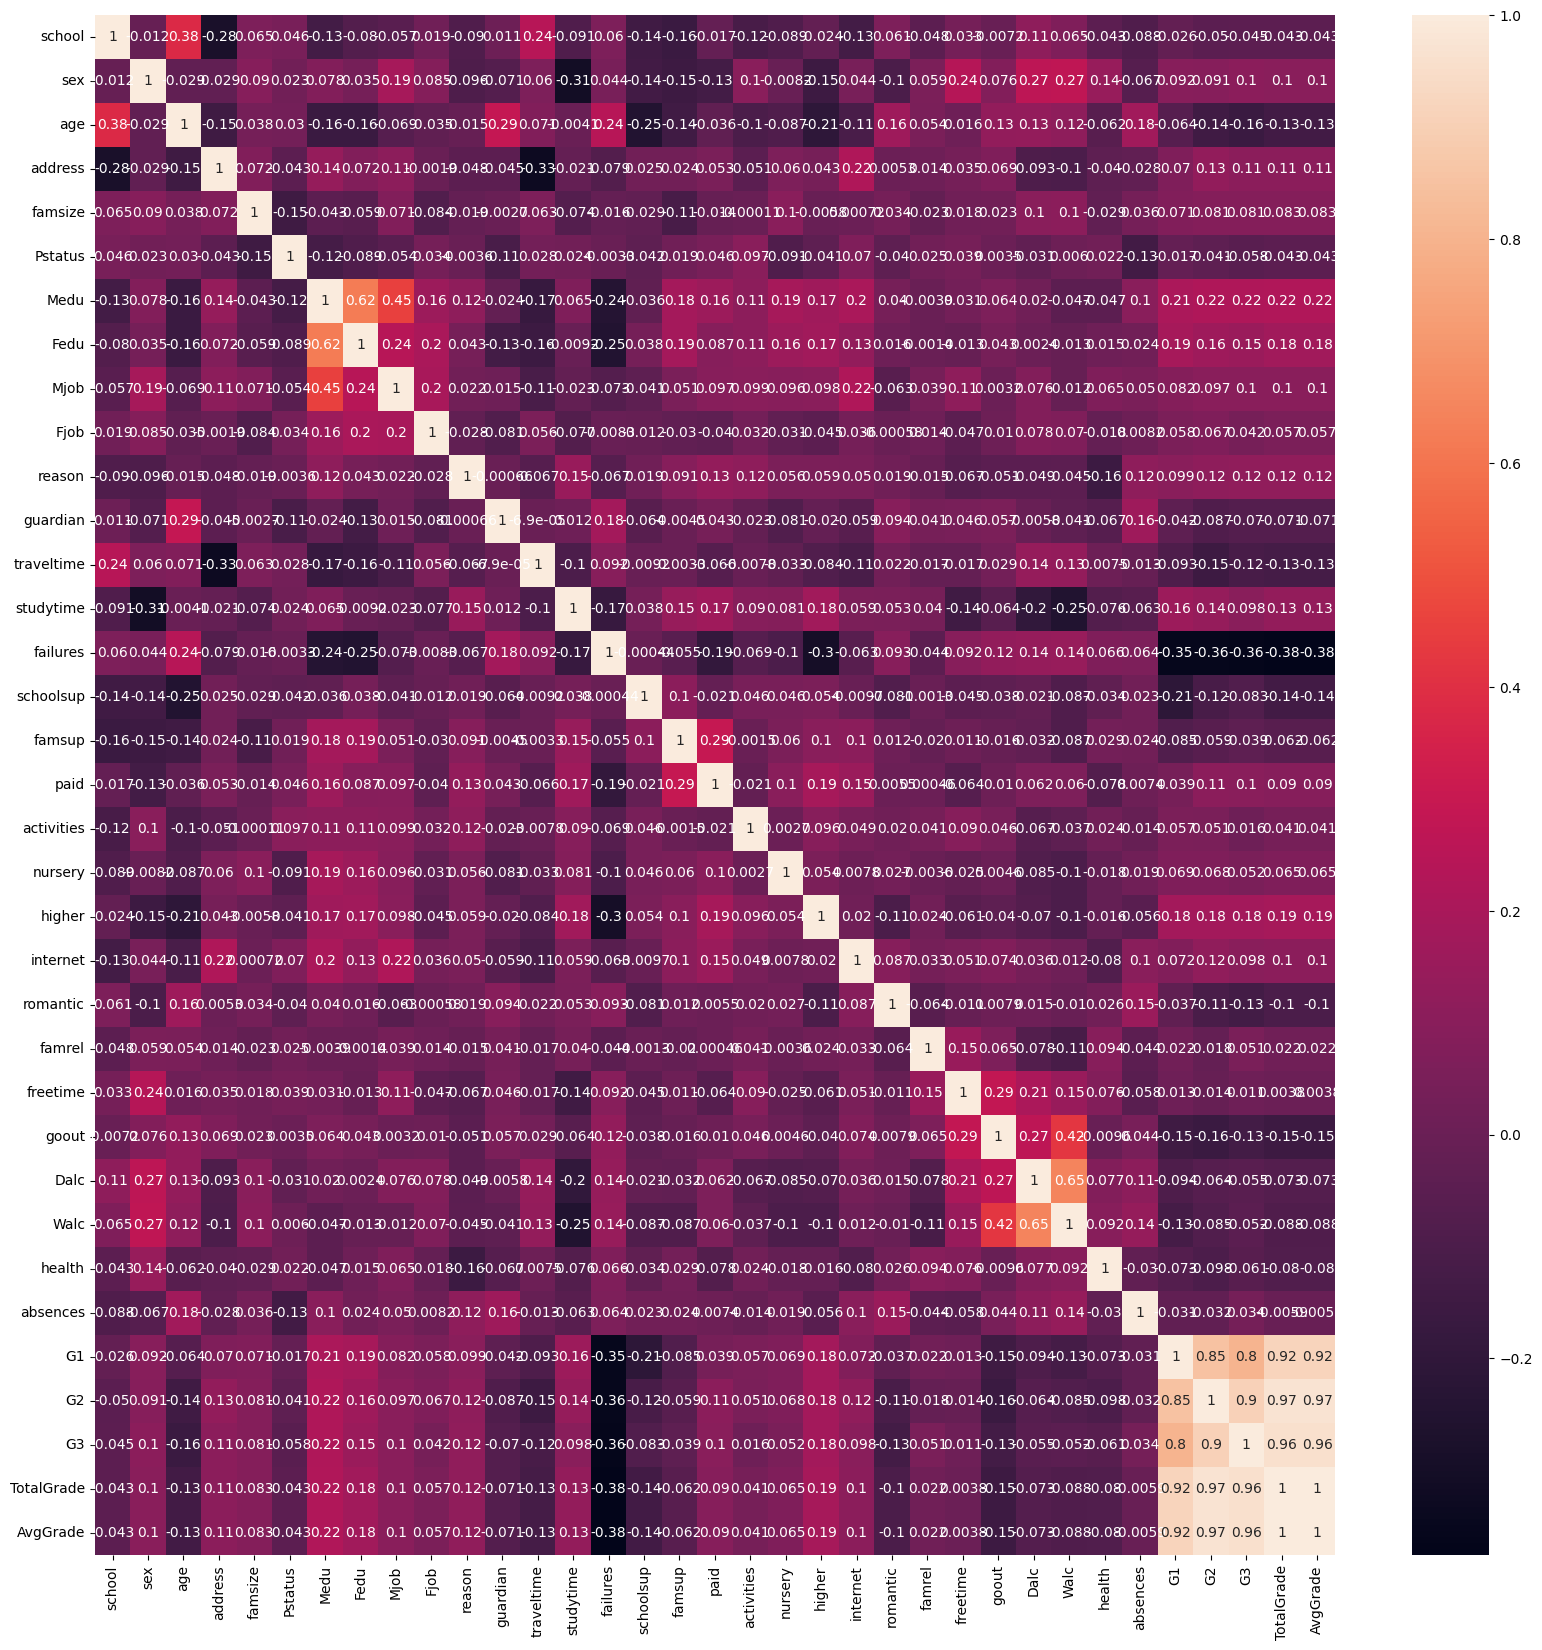

In [175]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
#plot heatmap
g = sns.heatmap(data[top_corr_features].corr(), annot= True)

# **Outlier Treatment**

Residual Plots

Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price. A ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature.

In [176]:
df_x, df_y = data.iloc[:,:8], data.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


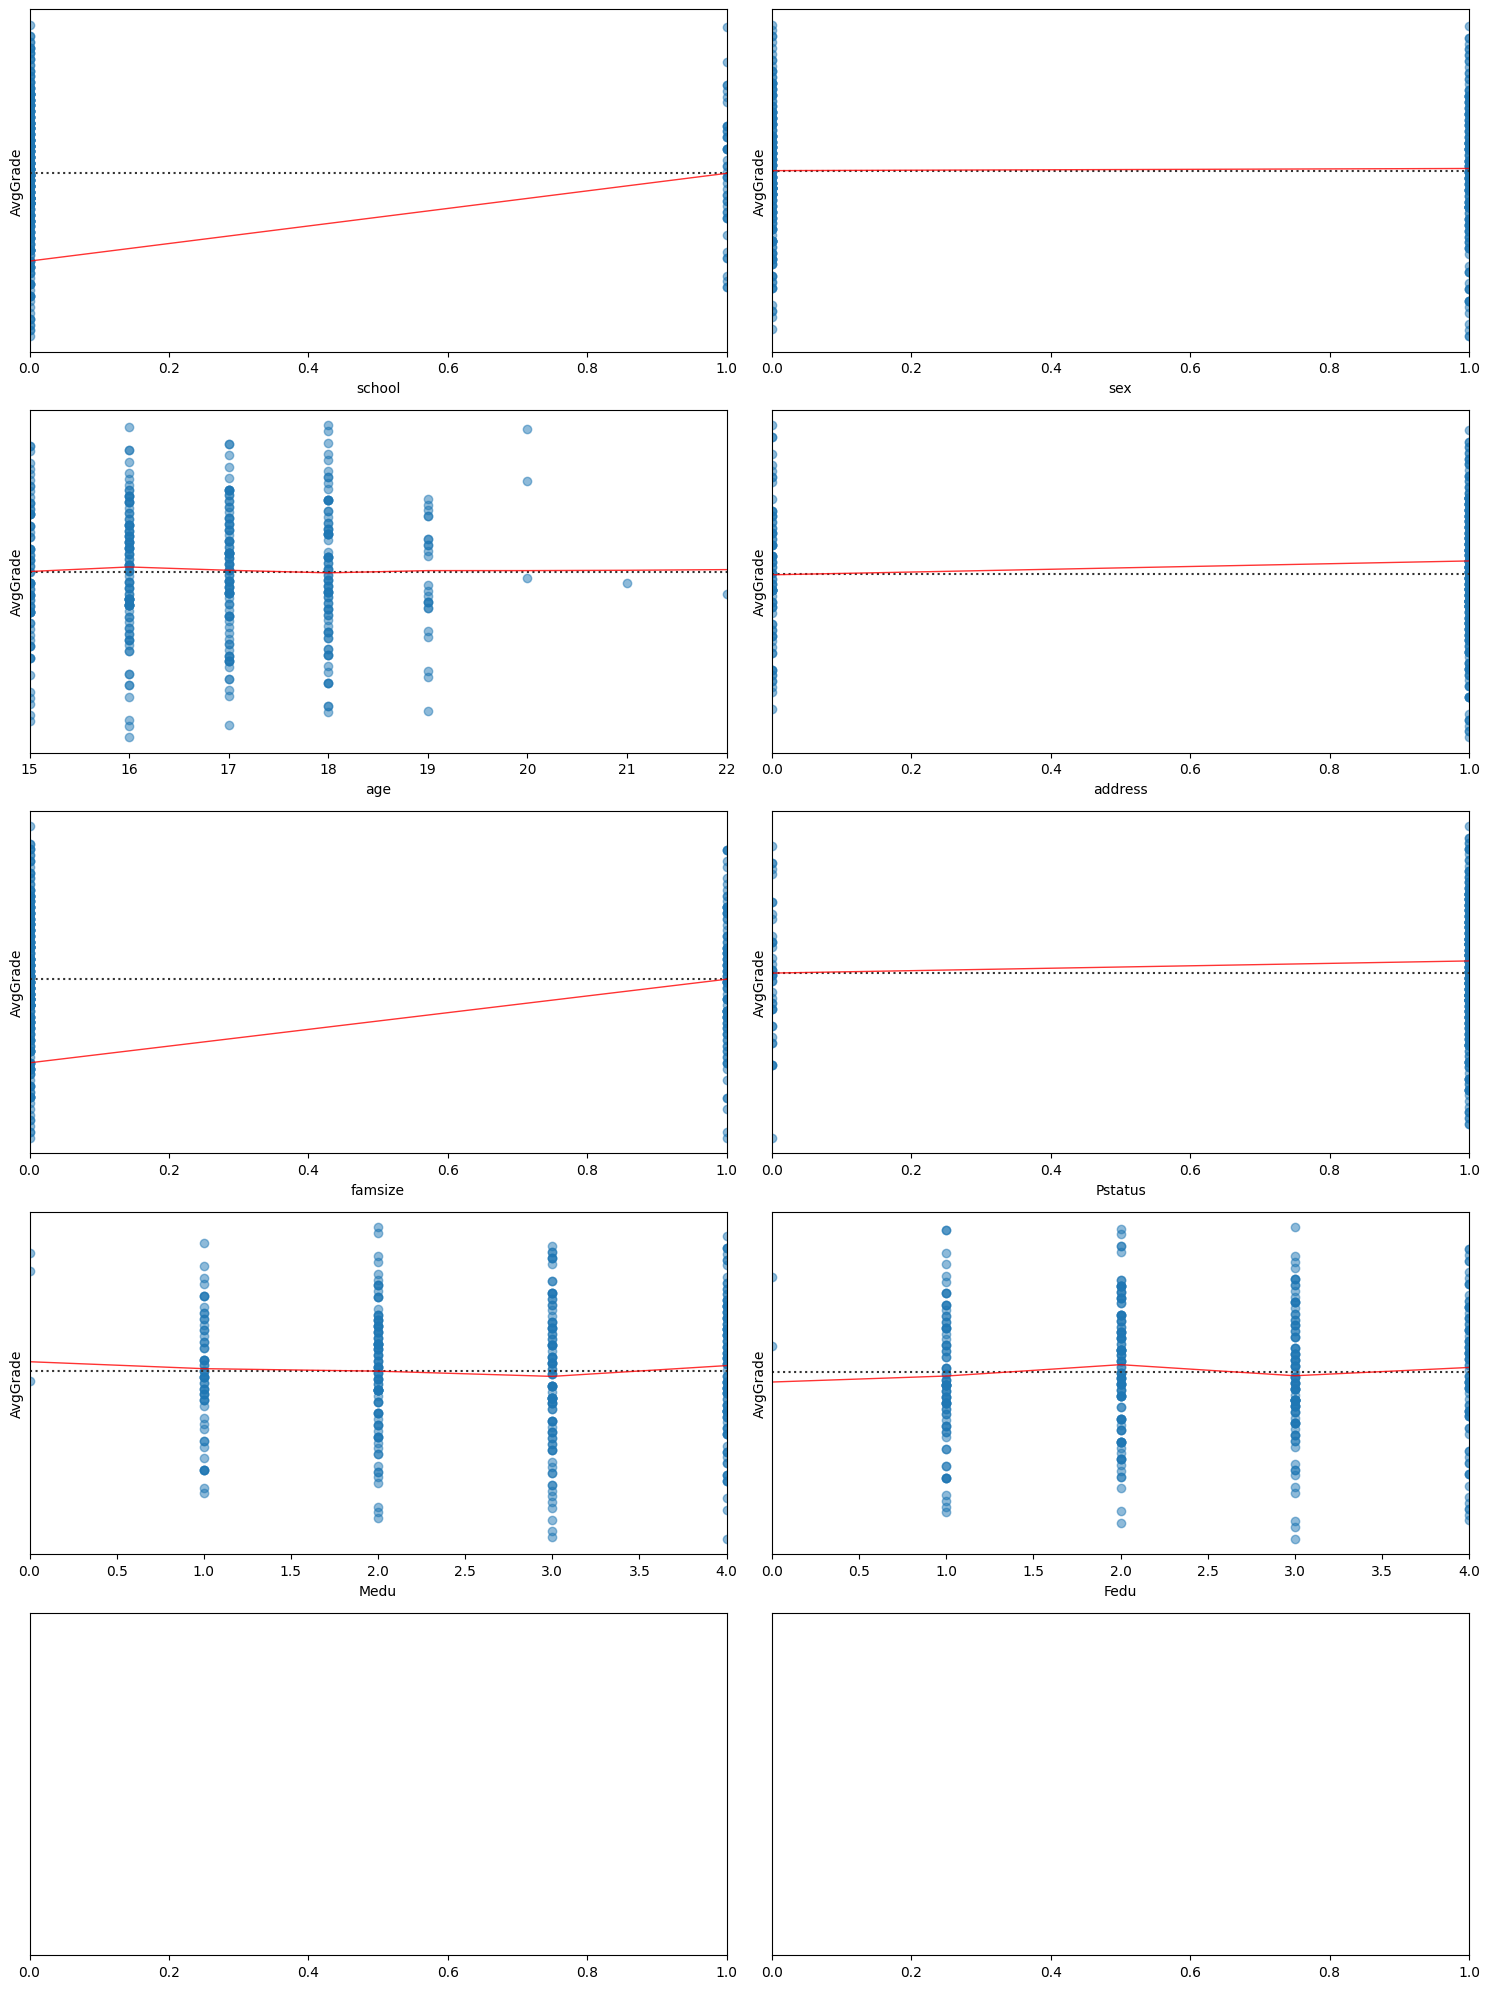

In [177]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))

sns.residplot(x=df_x.iloc[:, 0], y=df_y, lowess=True, ax=axes[0, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 1], y=df_y, lowess=True, ax=axes[0, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 2], y=df_y, lowess=True, ax=axes[1, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 3], y=df_y, lowess=True, ax=axes[1, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 4], y=df_y, lowess=True, ax=axes[2, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 5], y=df_y, lowess=True, ax=axes[2, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 6], y=df_y, lowess=True, ax=axes[3, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

sns.residplot(x=df_x.iloc[:, 7], y=df_y, lowess=True, ax=axes[3, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})


plt.setp(axes, yticks=[])
plt.tight_layout()

In [178]:
data.describe()

school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...       goout  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.108861   
std      1.094735    1.088201    1.227473    0.863542  ...    1.113278   
min      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
25%      2.000000    2.000000    2.000000    2.000000  ...    2.000000   
50%      3.000000    2.000000    2.000000    2.000000  ...    3.000000   
75%      4.000000    3.000000    3.000000    3.000000  ...    4.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

             Dalc        Walc      health    absences          G1          G2  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     1.481013    2.291139    3.554430    5.708861   10.908861   10.713924   
std      0.890741    1.287897    1.390303    8.003096    3.319195    3.761505   
min      1.000000    1.000000    1.000000    0.000000    3.000000    0.000000   
25%      1.000000    1.000000    3.000000    0.000000    8.000000    9.000000   
50%      1.000000    2.000000    4.000000    4.000000   11.000000   11.000000   
75%      2.000000    3.000000    5.000000    8.000000   13.000000   13.000000   
max      5.000000    5.000000    5.000000   75.000000   19.000000   19.000000   

               G3  TotalGrade    AvgGrade  
count  395.000000  395.000000  395.000000  
mean    10.415190   32.037975   10.679325  
std      4.581443   11.090357    3.696786  
min      0.000000    4.000000    1.333333  
25%      8.000000   25.000000    8.333333  
50%     11.000000   32.000000   10.666667  
75%     14.000000   40.000000   13.333333  
max     20.000000   58.000000   19.333333  

[8 rows x 35 columns]

<Axes: ylabel='G3'>

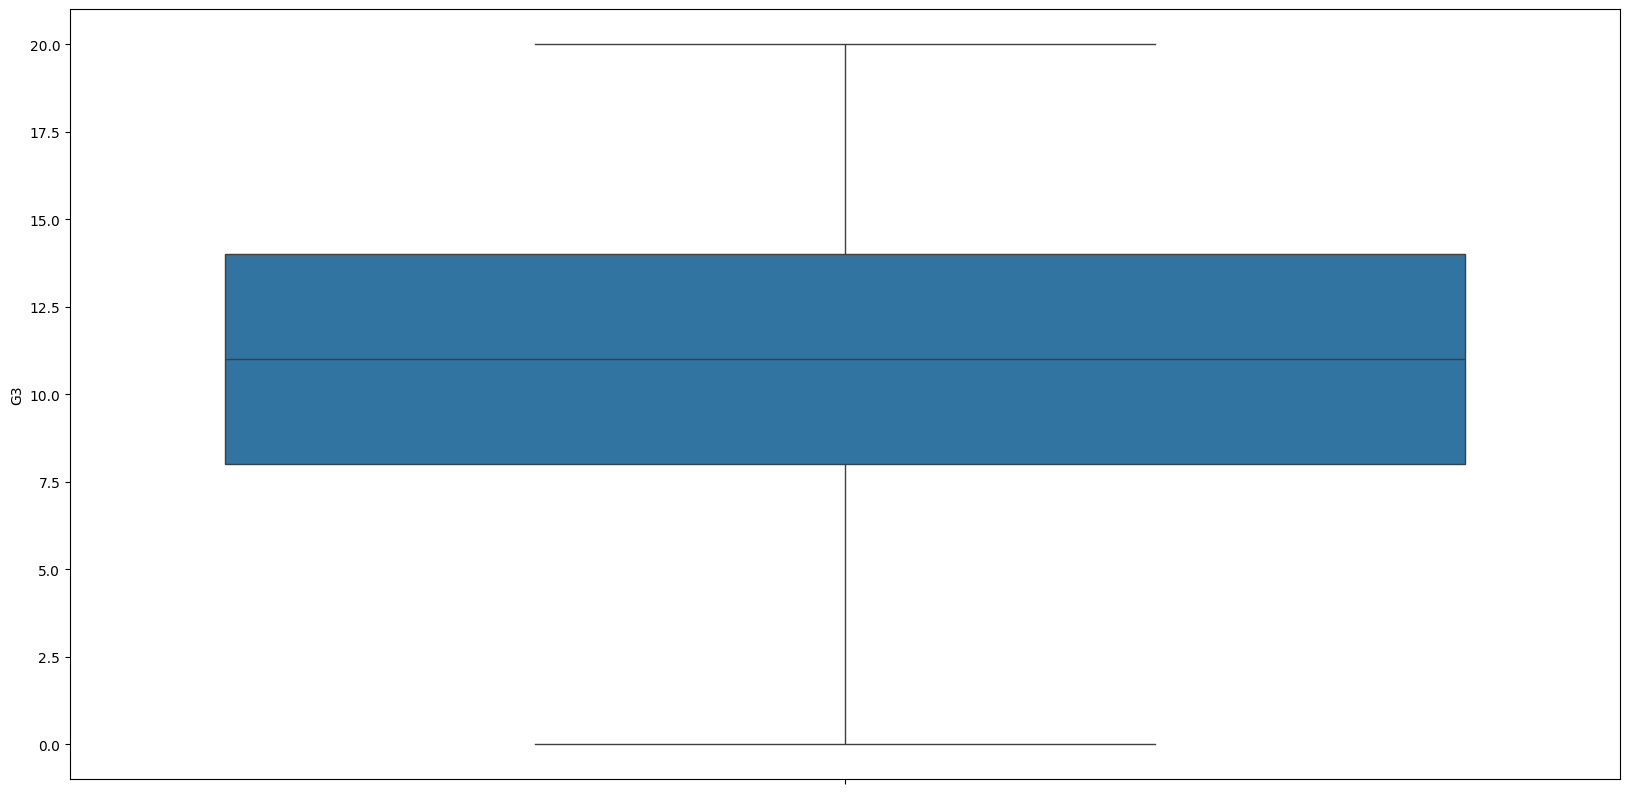

In [179]:
data.G3.describe()
plt.figure(figsize = (20,10))
sns.boxplot(data['G3'])

In [180]:
#Calculate threshold
q1 = np.percentile(data['G3'], 25)
min_threshold = q1 - 1
print("25th Percentile (Q1):", q1)
print("Calculated min_threshold:", min_threshold)

q3 = data['G3'].quantile(0.75)
max_threshold = q3 + 1
print("75th Percentile (Q3):", q3)
print("Calculated max_threshold:", max_threshold)


25th Percentile (Q1): 8.0
Calculated min_threshold: 7.0
75th Percentile (Q3): 14.0
Calculated max_threshold: 15.0


In [181]:
# checking
data[data.G3<min_threshold]

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
7         0    0   17        1        0        0     4     4     2     4  ...   
18        0    1   17        1        0        1     3     2     3     3  ...   
35        0    0   15        1        0        1     2     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
383       1    1   19        0        0        1     1     1     2     3  ...   
384       1    1   18        0        0        1     4     2     2     2  ...   
386       1    0   18        0        0        1     4     4     4     0  ...   
387       1    0   19        0        0        1     2     3     3     2  ...   
389       1    0   18        1        0        1     1     1     2     2  ...   

     goout  Dalc  Walc  health  absences  G1  G2  G3  TotalGrade  AvgGrade  
0        4     1     1       3         6   5   6   6          17  5.666667  
1        3     1     1       3         4   5   5   6          16  5.333333  
7        4     1     1       1         6   6   5   6          17  5.666667  
18       5     2     4       5        16   6   5   5          16  5.333333  
35       1     1     1       5         0   8   7   6          21  7.000000  
..     ...   ...   ...     ...       ...  ..  ..  ..         ...       ...  
383      2     1     3       5         0   6   5   0          11  3.666667  
384      3     4     3       3        14   6   5   5          16  5.333333  
386      3     2     2       5         7   6   5   6          17  5.666667  
387      2     1     2       5         0   7   5   0          12  4.000000  
389      1     1     1       5         0   6   5   0          11  3.666667  

[61 rows x 35 columns]

In [182]:
# filtering the outliers and saving the data to a new dataframe data2
df_cleaned = data[(data.G3>min_threshold)&(data.G3<max_threshold)]
df_cleaned.shape

(252, 35)

In [184]:
df_cleaned_x, df_cleaned_y = df_cleaned.iloc[:,:8], df_cleaned.iloc[:,-1]

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


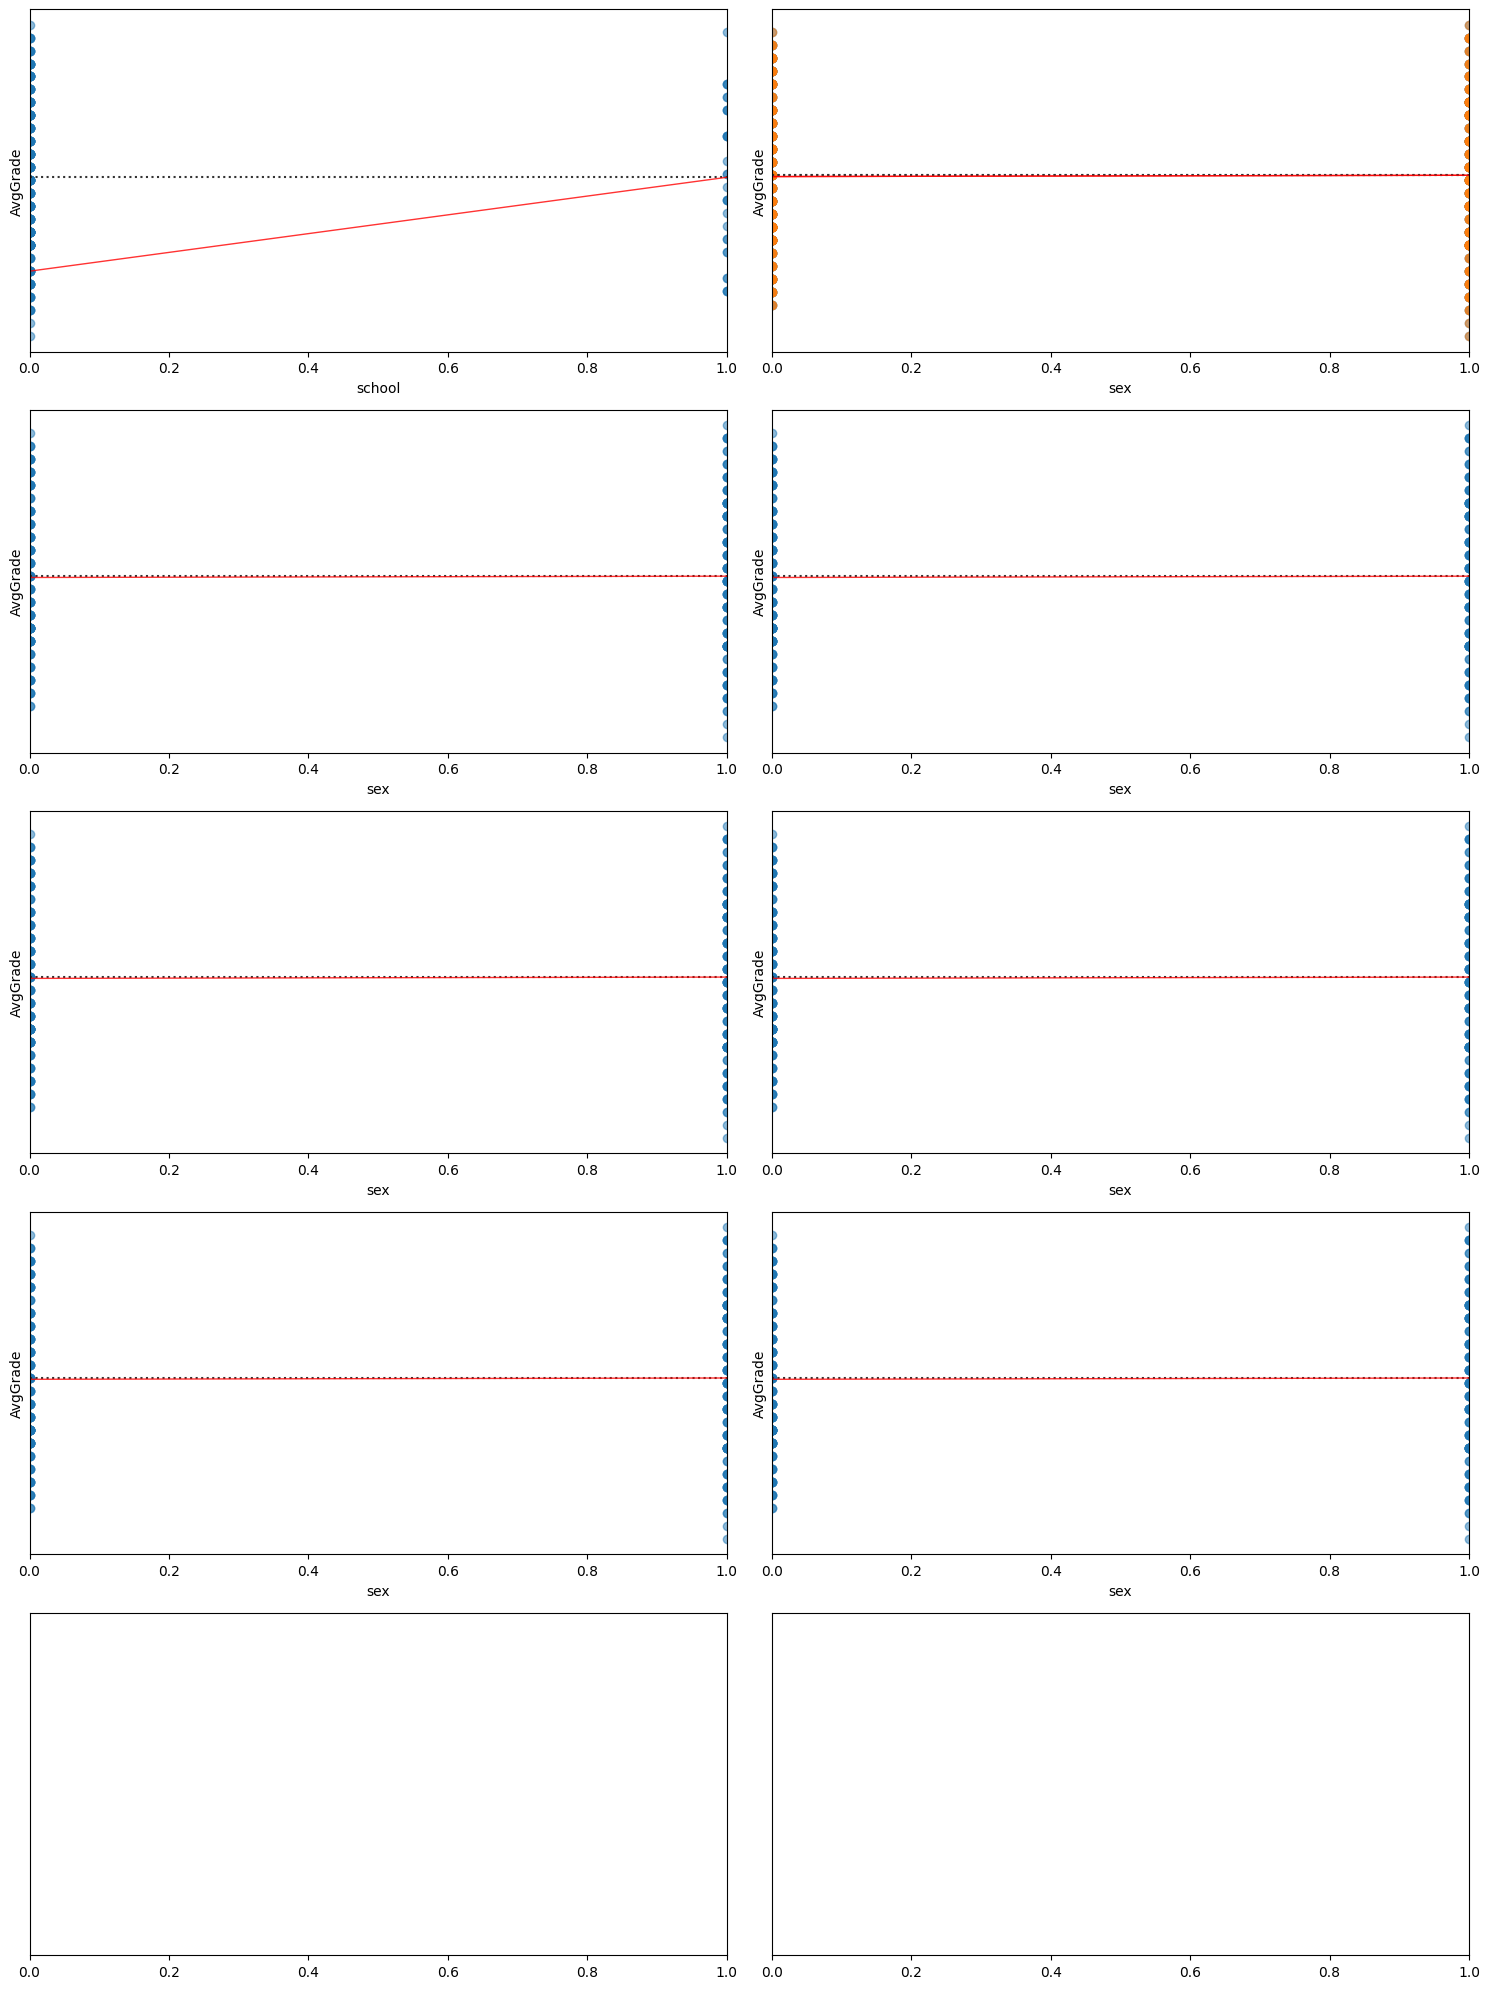

In [185]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(x=df_cleaned_x.iloc[:, 0], y=df_cleaned_y, lowess=True, ax=axes[0, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[0, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[1, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[0, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[1, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[2, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[2, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[3, 0],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sns.residplot(x=df_cleaned_x.iloc[:, 1], y=df_cleaned_y, lowess=True, ax=axes[3, 1],
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()


# **Model Building**



In [130]:
#Creating new features
data['TotalGrade'] = data['G1'] + data['G2'] + data['G3']
data['AvgGrade'] = data['TotalGrade'] / 3
data.head(5)

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   goout  Dalc  Walc  health  absences  G1  G2  G3  TotalGrade   AvgGrade  
0      4     1     1       3         6   5   6   6          17   5.666667  
1      3     1     1       3         4   5   5   6          16   5.333333  
2      2     2     3       3        10   7   8  10          25   8.333333  
3      2     1     1       5         2  15  14  15          44  14.666667  
4      2     1     2       5         4   6  10  10          26   8.666667  

[5 rows x 35 columns]

In [131]:
X = data.drop(['TotalGrade', 'AvgGrade'], axis=1)
y = data[['AvgGrade', 'TotalGrade']]

**Perform OneHotEncoder, StandardScaler and ColumnTransformer**

In [132]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cols_string),
         ("StandardScaler", numeric_transformer, cols_numerical),
    ]
)

X = preprocessor.fit_transform(X)

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [134]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((316, 59), (79, 59))

In [135]:
y_train.shape

(316, 2)

# **Linear Regression**

In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [137]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [138]:
y_test

AvgGrade  TotalGrade
78    8.666667          26
371  12.666667          38
248   4.333333          13
55    9.000000          27
390   9.000000          27
..         ...         ...
364  11.666667          35
82    6.333333          19
114   9.000000          27
3    14.666667          44
18    5.333333          16

[79 rows x 2 columns]

In [139]:
model.score(X, y)

1.0

In [140]:
# Evaluate Train and Test dataset
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

In [141]:
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print("- R2 Score: {:.4f}".format(model_train_r2))

print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


The MAE value of 0 indicates no error on the model.
**The training and test sets have the same data**

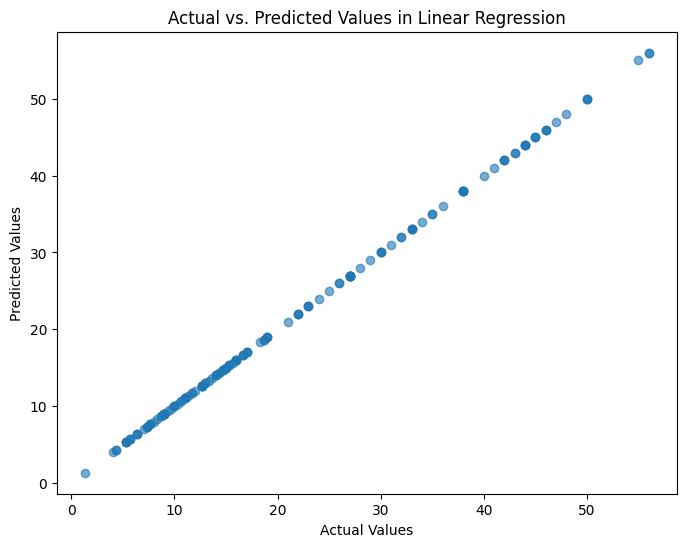

In [142]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values in Linear Regression")
plt.show()

In [143]:
pd.DataFrame({
    'Actual_TotalGrade': y_test['TotalGrade'].values,
    'Predicted_TotalGrade': y_test_pred[:, 1],
    'Actual_AvgGrade': y_test['AvgGrade'].values,
    'Predicted_AvgGrade': y_test_pred[:, 0]
})

Actual_TotalGrade  Predicted_TotalGrade  Actual_AvgGrade  \
0                  26                  26.0         8.666667   
1                  38                  38.0        12.666667   
2                  13                  13.0         4.333333   
3                  27                  27.0         9.000000   
4                  27                  27.0         9.000000   
..                ...                   ...              ...   
74                 35                  35.0        11.666667   
75                 19                  19.0         6.333333   
76                 27                  27.0         9.000000   
77                 44                  44.0        14.666667   
78                 16                  16.0         5.333333   

    Predicted_AvgGrade  
0             8.666667  
1            12.666667  
2             4.333333  
3             9.000000  
4             9.000000  
..                 ...  
74           11.666667  
75            6.333333  
76            9.000000  
77           14.666667  
78            5.333333  

[79 rows x 4 columns]

# **Data Imputation**


* Remove 1%, 5%, and 10% of your data
randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error

In [144]:
df_imputation= data[['absences']]
df_imputation['1_percent'] = df_imputation[['absences']]
df_imputation['5_percent'] = df_imputation[['absences']]
df_imputation['10_percent'] = df_imputation[['absences']]
df_imputation.head()

<ipython-input-144-ea9abbbbfa3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['absences']]
<ipython-input-144-ea9abbbbfa3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['absences']]
<ipython-input-144-ea9abbbbfa3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

absences  1_percent  5_percent  10_percent
0         6          6          6           6
1         4          4          4           4
2        10         10         10          10
3         2          2          2           2
4         4          4          4           4

In [145]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [146]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
absences      absences              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [147]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [148]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

In [149]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
absences      absences         0.000000
1_percent    1_percent         1.012658
5_percent    5_percent         5.063291
10_percent  10_percent        10.126582


In [150]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [151]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Length of number_1_idx is 4 and it contains 1.0126582278481013% of total data in column | Total rows: 395
Length of number_5_idx is 20 and it contains 5.063291139240507% of total data in column | Total rows: 395
Length of number_10_idx is 40 and it contains 10.126582278481013% of total data in column | Total rows: 395


# **KNN Imputation**
The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [152]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [153]:
# imputed_number_df.sample(10)
imputed_number_df.head()

1_percent  5_percent  10_percent
0        6.0        6.0         6.0
1        4.0        4.0         4.0
2       10.0       10.0        10.0
3        2.0        2.0         2.0
4        4.0        4.0         4.0

In [154]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [155]:
absences_new = data["absences"]
imputed_mean = pd.concat([absences_new,imputed_number_df])
imputed_mean.columns = ["Absences","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Absences      64.049541
1_Percent     64.045091
5_Percent     64.036148
10_Percent    64.028652
dtype: float64

# **Mean based Imputation with Simpleimputer**
This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

In [156]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [157]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [158]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [159]:
absences_new = data["absences"]
combined_mean = pd.concat([absences_new,imputed_mean])
combined_mean.mean()

0             5.708861
1_percent     5.726343
5_percent     5.768000
10_percent    5.814085
dtype: float64

# **Imputation Using Multivariate Imputation by Chained Equation (MICE)**
This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [160]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         1.012658
5_percent    5_percent         5.063291
10_percent  10_percent        10.126582


In [161]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [162]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [163]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(df_imputation_mice), columns = df_imputation_mice.columns)
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [164]:
absences_new = data["absences"]

In [165]:
combined_mice = pd.concat([absences_new,imputed_training])
combined_mice.columns = ["absences","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

absences      5.708861
1_Percent     5.685268
5_Percent     5.723425
10_Percent    5.686271
dtype: float64

The MICE method showed no variablilty. Therefore this method is acceptable for the current dataset.

# **Answer the following questions**

* What are the data types? (Only numeric and categorical)

A: dtypes: int64(16), object(17)

* Are there missing values?

A: There are no missing values

* Which independent variables are useful to predict a target (dependent variable)?

A: Below is the rank of the dependent variables

1. G3
2. G2
3. absences
4. G1
5. failures
6. schoolsup
7. reason
8. paid
9. Mjob
10. Walc

* Which independent variables have missing data? How much?

A: No independent variables have any missing data or zeros.


* Do the training and test sets have the same data?

A: Yes, the training and test sets have the same data.


* In the predictor variables independent of all the other predictor variables?

A: Yes, they are not independet of each other. There is no multi - collinearity among  independent variable.


* Which predictor variables are the most important?

A:
1. G3
2. G2
3. absences
4. G1
5. failures
6. schoolsup
7. reason
8. paid
9. Mjob
10. Walc


* Do the ranges of the predictor variables make sense?

A: The range of "absences" variable is high, this implies high variablity in it's distribution.




References:

1. How to Identify the Most Important Predictor Variables in Regression Models https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models
2. 6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
3. KNN-Mar by Shesh https://colab.research.google.com/drive/1wEfzH165Ycm_EqVgwSz_r7SvILuj0KRW?usp=sharing&pli=1#scrollTo=84b72e78-b39d-4055-91ae-02816f94b8c2
4. Student Performance Dataset by Dev Ansodariya https://www.kaggle.com/datasets/sagaraiarchitect/laptop-price-explorer-the-ml-model

Copyright (c) 2024 Kesha Mehta

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

